Based on the historic data from LFB (London Fire Brigade Mobilisation Records - London Datastore) predict the number of fire engines that will have to be allocated per fire station in London and the areas with the highest risk.

In [196]:
# Let's import the useful libraries to solve this exercise

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import pprint

from scipy.stats import linregress

pd.set_option("display.max_columns", None) # settings to display all the columns

## 1. Read the dataset

Comment: Let's read the dataset available from 2009 to 2022

In [197]:
df= pd.read_csv('LFB Mobilisation data from January 2009.csv', low_memory=False)

In [198]:
df.head()

235138081  2009  0  38426  H271  1  01/01/2009 00:02:27  \
0  235138081  2009  0  38427  H212  2  01/01/2009 00:02:27   
1       2091  2009  0  38429  A341  1  01/01/2009 00:04:09   
2       3091  2009  0  38430  G232  1  01/01/2009 00:04:57   
3       5091  2009  0  38432  A311  1  01/01/2009 00:06:04   
4       5091  2009  0  38431  A312  2  01/01/2009 00:06:04   

                  NULL  01/01/2009 00:07:46  NULL.1  NULL.2  319  \
0  01/01/2009 00:06:40  01/01/2009 00:08:09   253.0    89.0  342   
1  01/01/2009 00:06:40  01/01/2009 00:09:17   151.0   157.0  308   
2  01/01/2009 00:06:45  01/01/2009 00:08:27   108.0   102.0  210   
3  01/01/2009 00:07:58  01/01/2009 00:09:57   114.0   119.0  233   
4  01/01/2009 00:08:26  01/01/2009 00:10:14   142.0   108.0  250   

   01/01/2009 00:16:46  01/01/2009 00:23:55  H27   Battersea  Home Station  \
0  01/01/2009 00:12:17  01/01/2009 00:12:17  H21     Clapham  Home Station   
1  01/01/2009 00:16:33  01/01/2009 00:17:48  A34    Edmonton  Home Station   
2  01/01/2009 00:20:38  01/01/2009 00:20:38  G23  Hillingdon  Home Station   
3  01/01/2009 00:11:58  01/01/2009 00:22:29  A31    Holloway  Home Station   
4                  NaN  01/01/2009 00:18:53  A31    Holloway  Home Station   

   1.1  Initial  Initial Mobilisation  NULL.3 NULL.4  
0    2  Initial  Initial Mobilisation     NaN    NaN  
1    1  Initial  Initial Mobilisation     NaN    NaN  
2    1  Initial  Initial Mobilisation     NaN    NaN  
3    1  Initial  Initial Mobilisation     NaN    NaN  
4    2  Initial  Initial Mobilisation     NaN    NaN

Comment: The columns of the dataset are not defined. <br>
Let's compare the dataset of the last 3 years to determine the column names. 

In [199]:
df1 = pd.read_excel (r'LFB Mobilisation data Last 3 years.xlsx')

In [200]:
df1.head()

IncidentNumber  CalYear  HourOfCall  ResourceMobilisationId Resource_Code  \
0  000008-01012018     2018           0                 5055153          A392   
1  000009-01012018     2018           0                 5055154          E431   
2  000010-01012018     2018           0                 5055155          A361   
3  000011-01012018     2018           0                 5055156          A351   
4  000014-01012018     2018           0                 5055157          F211   

  PerformanceReporting DateAndTimeMobilised    DateAndTimeMobile  \
0                    1  01/01/2018 00:04:25  01/01/2018 00:05:38   
1                    1  01/01/2018 00:04:31  01/01/2018 00:05:23   
2                    1  01/01/2018 00:04:34  01/01/2018 00:05:36   
3                    1  01/01/2018 00:04:58  01/01/2018 00:05:17   
4                    1  01/01/2018 00:07:47  01/01/2018 00:08:58   

    DateAndTimeArrived  TurnoutTimeSeconds  TravelTimeSeconds  \
0  01/01/2018 00:10:13                73.0              275.0   
1  01/01/2018 00:06:55                52.0               92.0   
2  01/01/2018 00:08:26                62.0              170.0   
3  01/01/2018 00:05:20                19.0                3.0   
4  01/01/2018 00:11:48                71.0              170.0   

   AttendanceTimeSeconds      DateAndTimeLeft  DateAndTimeReturned  \
0                    348  01/01/2018 00:16:38                  NaN   
1                    144  01/01/2018 00:08:31                  NaN   
2                    232  01/01/2018 00:13:11                  NaN   
3                     22  01/01/2018 00:26:09                  NaN   
4                    241  01/01/2018 00:31:13                  NaN   

  DeployedFromStation_Code DeployedFromStation_Name DeployedFromLocation  \
0                      A39                 Finchley         Home Station   
1                      E43                Beckenham         Home Station   
2                      A36                Southgate         Home Station   
3                      A35                  Enfield         Home Station   
4                      F21                Stratford         Home Station   

   PumpOrder PlusCode_Code  PlusCode_Description  DelayCodeId  \
0          1       Initial  Initial Mobilisation          NaN   
1          1       Initial  Initial Mobilisation          NaN   
2          1       Initial  Initial Mobilisation          NaN   
3          1       Initial  Initial Mobilisation          NaN   
4          1       Initial  Initial Mobilisation          NaN   

  DelayCode_Description  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN

Comment: The column names of the two datasets and their content seem consistent. <br>
Let's update our dataset and rename the columns.

In [201]:
# Let's rename the columns

df.columns =['IncidentNumber', 
             'CalYear', 
             'HourOfCall', 
             'ResourceMobilisationId',
             'Resource_Code',
             'PerformanceReporting',
             'DateAndTimeMobilised',
             'DateAndTimeMobile',
             'DateAndTimeArrived',
             'TurnoutTimeSeconds',
             'TravelTimeSeconds',
             'AttendanceTimeSeconds',
             'DateAndTimeLeft',
             'DateAndTimeReturned',
             'DeployedFromStation_Code',
             'DeployedFromStation_Name',
             'DeployedFromLocation',
             'PumpOrder',
             'PlusCode_Code',
             'PlusCode_Description',
             'DelayCodeId',
             'DelayCode_Description'
            ]

# Let's check how the dataset looks like

df.head()

IncidentNumber  CalYear  HourOfCall  ResourceMobilisationId Resource_Code  \
0      235138081     2009           0                   38427          H212   
1           2091     2009           0                   38429          A341   
2           3091     2009           0                   38430          G232   
3           5091     2009           0                   38432          A311   
4           5091     2009           0                   38431          A312   

  PerformanceReporting DateAndTimeMobilised    DateAndTimeMobile  \
0                    2  01/01/2009 00:02:27  01/01/2009 00:06:40   
1                    1  01/01/2009 00:04:09  01/01/2009 00:06:40   
2                    1  01/01/2009 00:04:57  01/01/2009 00:06:45   
3                    1  01/01/2009 00:06:04  01/01/2009 00:07:58   
4                    2  01/01/2009 00:06:04  01/01/2009 00:08:26   

    DateAndTimeArrived  TurnoutTimeSeconds  TravelTimeSeconds  \
0  01/01/2009 00:08:09               253.0               89.0   
1  01/01/2009 00:09:17               151.0              157.0   
2  01/01/2009 00:08:27               108.0              102.0   
3  01/01/2009 00:09:57               114.0              119.0   
4  01/01/2009 00:10:14               142.0              108.0   

   AttendanceTimeSeconds      DateAndTimeLeft  DateAndTimeReturned  \
0                    342  01/01/2009 00:12:17  01/01/2009 00:12:17   
1                    308  01/01/2009 00:16:33  01/01/2009 00:17:48   
2                    210  01/01/2009 00:20:38  01/01/2009 00:20:38   
3                    233  01/01/2009 00:11:58  01/01/2009 00:22:29   
4                    250                  NaN  01/01/2009 00:18:53   

  DeployedFromStation_Code DeployedFromStation_Name DeployedFromLocation  \
0                      H21                  Clapham         Home Station   
1                      A34                 Edmonton         Home Station   
2                      G23               Hillingdon         Home Station   
3                      A31                 Holloway         Home Station   
4                      A31                 Holloway         Home Station   

   PumpOrder PlusCode_Code  PlusCode_Description  DelayCodeId  \
0          2       Initial  Initial Mobilisation          NaN   
1          1       Initial  Initial Mobilisation          NaN   
2          1       Initial  Initial Mobilisation          NaN   
3          1       Initial  Initial Mobilisation          NaN   
4          2       Initial  Initial Mobilisation          NaN   

  DelayCode_Description  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN

In [202]:
# Let's check the tail of the dataset

df.tail()

IncidentNumber  CalYear  HourOfCall  ResourceMobilisationId  \
1916068  147682-31102021     2021          23                 5959301   
1916069  147682-31102021     2021          23                 5959299   
1916070  147683-31102021     2021          23                 5959302   
1916071  147684-31102021     2021          23                 5959303   
1916072  147684-31102021     2021          23                 5959304   

        Resource_Code PerformanceReporting DateAndTimeMobilised  \
1916068          F321                    2  31/10/2021 23:50:18   
1916069          A301             Not Used  31/10/2021 23:50:18   
1916070          H421                    1  31/10/2021 23:51:08   
1916071          F341                    1  31/10/2021 23:56:28   
1916072          F351                    2  31/10/2021 23:56:28   

           DateAndTimeMobile   DateAndTimeArrived  TurnoutTimeSeconds  \
1916068  31/10/2021 23:51:24  31/10/2021 23:55:26                66.0   
1916069  31/10/2021 23:51:49  31/10/2021 23:55:48                91.0   
1916070  31/10/2021 23:52:25  31/10/2021 23:54:29                77.0   
1916071  31/10/2021 23:57:59  01/11/2021 00:01:39                91.0   
1916072  31/10/2021 23:57:52  01/11/2021 00:03:57                84.0   

         TravelTimeSeconds  AttendanceTimeSeconds      DateAndTimeLeft  \
1916068              242.0                    308  31/10/2021 23:59:44   
1916069              239.0                    330  31/10/2021 23:58:53   
1916070              124.0                    201  31/10/2021 23:59:49   
1916071              220.0                    311  01/11/2021 00:14:02   
1916072              365.0                    449  01/11/2021 00:05:40   

        DateAndTimeReturned DeployedFromStation_Code DeployedFromStation_Name  \
1916068                 NaN                      F32          Stoke Newington   
1916069                 NaN                      A30                Islington   
1916070                 NaN                      H42                 Richmond   
1916071                 NaN                      F34                Chingford   
1916072                 NaN                      F35                 Woodford   

        DeployedFromLocation  PumpOrder PlusCode_Code  PlusCode_Description  \
1916068         Home Station          2       Initial  Initial Mobilisation   
1916069         Home Station          3       Initial  Initial Mobilisation   
1916070         Home Station          1       Initial  Initial Mobilisation   
1916071         Home Station          1       Initial  Initial Mobilisation   
1916072         Home Station          2       Initial  Initial Mobilisation   

         DelayCodeId DelayCode_Description  
1916068          NaN                   NaN  
1916069          NaN                   NaN  
1916070          NaN                   NaN  
1916071          NaN                   NaN  
1916072          NaN                   NaN

Comment: On 9 January 2014, ten London fire stations were closed as part of the 
Authority’s Fifth London Safety Plan (LSP5), and fire station areas were 
changed to reflect these closures with the station areas of closed stations 
being distributed to adjacent fire station areas. To provide consistent incident 
data, stations grounds have been changed for all incidents in this data set and 
reflect the station areas in use since 9 January 2014. <br>
Let's remove from the dataset the data before 9 January 2014.

In [203]:
# Let's convert argument to date with Pandas datetime function 

df['DateAndTimeMobilised'] = pd.to_datetime(df['DateAndTimeMobilised'])

# Let's drop the rows before 9th Jan 2014

closure_day = '09.01.2014'
df.drop(df.loc[df['DateAndTimeMobilised'] < closure_day].index, inplace=True)

df.head(500)

IncidentNumber  CalYear  HourOfCall  ResourceMobilisationId  \
777086        3202141     2014           0                 4238875   
777087        3202141     2014           0                 4238874   
777088        3203141     2014           0                 4238877   
777089        3203141     2014           0                 4238878   
777090        3204141     2014           0                 4238879   
777091        3205141     2014           0                 4238880   
777092        3207141     2014           0                 4238881   
777093        3208141     2014           0                 4238882   
777094        3212141     2014           1                 4238883   
777095        3211141     2014           1                 4238884   
777096        3214141     2014           1                 4238885   
777097        3215141     2014           2                 4238886   
777098        3219141     2014           2                 4238887   
777099        3219141     2014           2                 4238889   
777100        3219141     2014           2                 4238890   
777101        3224141     2014           2                 4238893   
777102        3225141     2014           3                 4238896   
777103        3229141     2014           4                 4238898   
777104        3229141     2014           4                 4238899   
777105        3230141     2014           4                 4244173   
777106        3230141     2014           4                 4244172   
777107        3238141     2014           5                 4238900   
777108        3243141     2014           5                 4238901   
777109        3244141     2014           6                 4238903   
777110        3245141     2014           6                 4238907   
777111        3245141     2014           6                 4238905   
777112        3245141     2014           6                 4238906   
777113        3246141     2014           6                 4238904   
777114        3250141     2014           6                 4238909   
777115        3251141     2014           6                 4238912   
777116        3257141     2014           7                 4238919   
777117        3259141     2014           7                 4238920   
777118        3258141     2014           7                 4238921   
777119        3261141     2014           7                 4238922   
777120        3261141     2014           7                 4238923   
777121        3265141     2014           7                 4238924   
777122        3267141     2014           7                 4238925   
777123        3268141     2014           8                 4238926   
777124        3269141     2014           8                 4238927   
777125        3270141     2014           8                 4238928   
777126        3270141     2014           8                 4238929   
777127        3272141     2014           8                 4238930   
777128        3273141     2014           8                 4238932   
777129        3273141     2014           8                 4238931   
777130        3274141     2014           8                 4238933   
777131        3275141     2014           8                 4238934   
777132        3277141     2014           8                 4238935   
777133        3279141     2014           8                 4238936   
777134        3280141     2014           9                 4238937   
777135        3281141     2014           9                 4238938   
777136        3282141     2014           9                 4238939   
777137        3283141     2014           9                 4238940   
777138        3284141     2014           9                 4238942   
777139        3284141     2014           9                 4238941   
777140        3285141     2014           9                 4238944   
777141        3286141     2014           9                 4238945   
777142        328

## 2. Preprocessing

### 2.1 Dataset analysis

In [204]:
# Let's insepct the dataset 

df.describe()

CalYear    HourOfCall  ResourceMobilisationId  TurnoutTimeSeconds  \
count  1.057029e+06  1.057029e+06            1.057029e+06        1.048729e+06   
mean   2.017851e+03  1.346306e+01            5.158550e+06        7.505763e+01   
std    2.065253e+00  6.312755e+00            4.661630e+05        4.068132e+01   
min    2.014000e+03  0.000000e+00            4.238874e+06        0.000000e+00   
25%    2.016000e+03  9.000000e+00            4.752879e+06        5.300000e+01   
50%    2.018000e+03  1.400000e+01            5.147515e+06        7.000000e+01   
75%    2.020000e+03  1.900000e+01            5.573139e+06        9.000000e+01   
max    2.021000e+03  2.300000e+01            5.959304e+06        1.185000e+03   

       TravelTimeSeconds  AttendanceTimeSeconds     PumpOrder    DelayCodeId  
count       1.048645e+06           1.057029e+06  1.057029e+06  257586.000000  
mean        2.780194e+02           3.515678e+02  1.474236e+00      10.357081  
std         1.485682e+02           1.518748e+02  7.965155e-01       2.238397  
min         0.000000e+00           0.000000e+00  1.000000e+00       3.000000  
25%         1.800000e+02           2.530000e+02  1.000000e+00       9.000000  
50%         2.530000e+02           3.270000e+02  1.000000e+00      12.000000  
75%         3.450000e+02           4.210000e+02  2.000000e+00      12.000000  
max         1.195000e+03           1.200000e+03  1.300000e+01      13.000000

In [205]:
df.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1057029 entries, 777086 to 1916072
Data columns (total 22 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   IncidentNumber            1057029 non-null  object        
 1   CalYear                   1057029 non-null  int64         
 2   HourOfCall                1057029 non-null  int64         
 3   ResourceMobilisationId    1057029 non-null  int64         
 4   Resource_Code             1057029 non-null  object        
 5   PerformanceReporting      1057029 non-null  object        
 6   DateAndTimeMobilised      1057029 non-null  datetime64[ns]
 7   DateAndTimeMobile         1048760 non-null  object        
 8   DateAndTimeArrived        1057029 non-null  object        
 9   TurnoutTimeSeconds        1048729 non-null  float64       
 10  TravelTimeSeconds         1048645 non-null  float64       
 11  AttendanceTimeSeconds     1057029 non-null  i

In [206]:
df.isna().sum()

IncidentNumber                   0
CalYear                          0
HourOfCall                       0
ResourceMobilisationId           0
Resource_Code                    0
PerformanceReporting             0
DateAndTimeMobilised             0
DateAndTimeMobile             8269
DateAndTimeArrived               0
TurnoutTimeSeconds            8300
TravelTimeSeconds             8384
AttendanceTimeSeconds            0
DateAndTimeLeft               1324
DateAndTimeReturned         925527
DeployedFromStation_Code        22
DeployedFromStation_Name        22
DeployedFromLocation           707
PumpOrder                        0
PlusCode_Code                    0
PlusCode_Description             0
DelayCodeId                 799443
DelayCode_Description       799443
dtype: int64

### 2.2 Exploring the data
Since there is no explanation of the dataset and its content, let's explore the columns

In [207]:
column_1 = df['HourOfCall'].unique()
print(sorted(column_1))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [208]:
column_2 = df['PerformanceReporting'].unique()
print(sorted(column_2))

['1', '2', 'Not Used']


In [209]:
column_3 = df['DeployedFromStation_Name'].unique()
print((column_3))

['Soho' 'Euston' 'Croydon' 'Knightsbridge' 'Woolwich' 'Southgate' 'Barnet'
 'Peckham' 'Ilford' 'Poplar' 'Kensington' 'Clapham' 'West Norwood'
 'Ealing' 'Kentish Town' 'Woodford' 'Hainault' 'Stanmore' 'Harrow'
 'Mill Hill' 'Bexley' 'Belsize' 'Stoke Newington' 'New Malden' 'Finchley'
 'Southall' 'Beckenham' 'Dowgate' 'Dockhead' 'Lambeth' 'Hillingdon'
 'Shoreditch' 'Forest Hill' 'East Ham' 'Stratford' 'Hornsey' 'Purley'
 'Sutton' 'Wandsworth' 'Bromley' 'Harold Hill' 'Paddington' 'Lewisham'
 'Tottenham' 'Norbury' 'Mitcham' 'Wembley' 'Tooting' 'Wimbledon'
 'Wennington' 'Millwall' 'Acton' 'Hornchurch' 'Walthamstow' 'Holloway'
 'Edmonton' 'Richmond' 'Kingston' 'Heathrow' 'Eltham' 'Bethnal Green'
 'Chelsea' 'West Hampstead' 'Battersea' 'Barking' 'Homerton' 'Hammersmith'
 'Willesden' 'North Kensington' 'Twickenham' 'Wallington' 'Romford'
 'Dagenham' 'Northolt' 'Old Kent Road' 'Enfield' 'Lee Green' 'Greenwich'
 'Feltham' 'Leyton' 'East Greenwich' 'New Cross' 'Woodside' 'Heston'
 'Chingford' 'Hen

In [210]:
column_4 = df['DeployedFromLocation'].unique()
print((column_4))

['Home Station' 'Other Station' nan]


In [211]:
column_5 = df['PlusCode_Code'].unique()
print((column_5))

['Initial' 'add' 'rca']


In [212]:
column_6 = df['PlusCode_Description'].unique()
print((column_6))

['Initial Mobilisation' 'Addition to first attendance' 'Running call']


In [213]:
column_7 = df['DelayCodeId'].unique()
print((column_7))

[nan 11. 12.  9.  8.  7.  5. 13. 10.  3.  6.]


In [214]:
column_8 = df['DelayCode_Description'].unique()
print((column_8))

[nan 'Mob/Radio problems when mobilised' 'Not held up'
 'Traffic, roadworks, etc' 'Traffic calming measures'
 'Arrived but held up - Other reason' 'Address incomplete/wrong'
 'On outside duty when mobilised' 'Weather conditions'
 'At drills when mobilised' 'Appliance/Equipment defect']


In [215]:
column_9 = df['PumpOrder'].unique()
print((column_9))

[ 1  2  3  4  5  6  7  8  9 11 10 12 13]


In [216]:
df[df['PumpOrder'] == 12 ]

IncidentNumber  CalYear  HourOfCall  ResourceMobilisationId  \
1834815  053666-07052021     2021           8                 5837359   

        Resource_Code PerformanceReporting DateAndTimeMobilised  \
1834815          A231             Not Used  2021-07-05 08:48:16   

           DateAndTimeMobile   DateAndTimeArrived  TurnoutTimeSeconds  \
1834815  07/05/2021 08:49:25  07/05/2021 09:05:30                69.0   

         TravelTimeSeconds  AttendanceTimeSeconds      DateAndTimeLeft  \
1834815              965.0                   1034  07/05/2021 11:22:52   

        DateAndTimeReturned DeployedFromStation_Code DeployedFromStation_Name  \
1834815                 NaN                      A23                   Euston   

        DeployedFromLocation  PumpOrder PlusCode_Code  PlusCode_Description  \
1834815         Home Station         12       Initial  Initial Mobilisation   

         DelayCodeId DelayCode_Description  
1834815          NaN                   NaN

Comment: 'PumpOrder' identifies the number of fire engines being deployed on the same emergency call 

### 2.3 Exploring a past event 

In [217]:
# Let's see what the dataset shows when on 14 June 2017 at 00:54 BST the Grenfell Tower incident occured

start_day = '14.06.2017 00:40:00'
end_day = '14.06.2017 08:00:00'
start_day = pd.to_datetime(start_day)
end_day = pd.to_datetime(end_day)
grenfell = df[df['DateAndTimeMobilised'].between(start_day, end_day)]
grenfell.head(50)

IncidentNumber  CalYear  HourOfCall  ResourceMobilisationId  \
1240604  076123-14062017     2017           1                 4926275   
1240605  076124-14062017     2017           1                 4926277   
1240606  076189-14062017     2017           2                 4926324   
1240607  076188-14062017     2017           2                 4926325   
1240608  076297-14062017     2017           3                 4926338   
1240609  076306-14062017     2017           3                 4926340   
1240610  076315-14062017     2017           3                 4926343   
1240611  076346-14062017     2017           4                 4926354   
1240612  076350-14062017     2017           4                 4926356   
1240613  076356-14062017     2017           4                 4926377   
1240614  076362-14062017     2017           4                 4926379   
1240615  076364-14062017     2017           4                 4926380   
1240616  076369-14062017     2017           5                 4926382   
1240617  076388-14062017     2017           5                 4926391   
1240618  076399-14062017     2017           6                 4926394   
1240619  076400-14062017     2017           6                 4926395   
1240620  076401-14062017     2017           6                 4926396   
1240621  076404-14062017     2017           6                 4926399   
1240622  076406-14062017     2017           6                 4926400   
1240623  076408-14062017     2017           7                 4926401   
1240624  076412-14062017     2017           7                 4926408   
1240625  076414-14062017     2017           7                 4926412   
1240626  076415-14062017     2017           7                 4926414   
1240627  076417-14062017     2017           7                 4926416   
1240628  076422-14062017     2017           7                 4926419   
1240629  076423-14062017     2017           7                 4926420   
1240630  076424-14062017     2017           8                 4926421   
1240631  076426-14062017     2017           8                 4926422   
1240632  076428-14062017     2017           8                 4926424   
1240633  076431-14062017     2017           8                 4926433   
1240634  076434-14062017     2017           8                 4926436   
1240635  076435-14062017     2017           8                 4926444   
1240636  076438-14062017     2017           8                 4926448   
1240637  076437-14062017     2017           8                 4926450   
1240638  076440-14062017     2017           8                 4926451   
1240639  076442-14062017     2017           8                 4926454   
1240640  076443-14062017     2017           8                 4926455   
1240641  076444-14062017     2017           8                 4926456   

        Resource_Code PerformanceReporting DateAndTimeMobilised  \
1240604          A301                    1  2017-06-14 00:47:43   
1240605          G242                    1  2017-06-14 00:47:58   
1240606          G232                    1  2017-06-14 01:34:11   
1240607          H251                    1  2017-06-14 01:34:19   
1240608          G232                    1  2017-06-14 02:29:09   
1240609          E252                    1  2017-06-14 02:33:39   
1240610          E251                    1  2017-06-14 02:38:15   
1240611          H252                    1  2017-06-14 03:17:32   
1240612          A321                    1  2017-06-14 03:26:27   
1240613          H252                    1  2017-06-14 03:42:55   
1240614          E291                    1  2017-06-14 03:47:50   
1240615          A281                    1  2017-06-14 03:50:17   
1240616          F281                    1  2017-06-14 04:02:22   
1240617          H361                    1  2017-06-14 04:49:23   
1240618          A281                    1  2017-06-14 05:18:50   
1240619          F221                    1  2017-06-14 05:27:29   
1240620          E431  

Comments: 
- The location of the incident occured between the time frame indicated is unknown but it's likely to be at Grenfell 
- Despite the same event, the 'Incident Number' column seems to have different values which suggests that that number is being generated individually by the stations
- The dataset suggests that the LFB stations across London involved have deployed one single unit from their station probably in order to avoid lack of vehicles in case other incidents occurred in their borough
- The attendance period doesn't seem to be realistic as it is too short for such an event hence this information cannot be considered as relevant 

In [218]:
grenfell_engine = df[df['DateAndTimeMobilised'].between(start_day, end_day)]['PumpOrder'].sum()
grenfell_engine

38

Comment: The total number of vehicles being deployed to the Grenfell match with the number that is published on this article https://en.wikipedia.org/wiki/London_Fire_Brigade

## 3. Working with the data
### 3.1 Grouping the Dataset

Comment:  Let's group the dataset by Station and calculate the total of the vehicles being deployed yearly

In [282]:
# Let's Count() the times that incidents occured

fireeng_station = df.groupby(by=['DeployedFromStation_Name', 'CalYear'], 
                          as_index=False)['PumpOrder'].count()

fireeng_station.rename(columns={'PumpOrder': 'Yearly Tot Eng Deployed'}, inplace=True)




Comment: It's reasonable assuming that every station allows for the same vehicle to be deployed four times per day (6hour attendance period). Also, LFB allows for four shifts hence 6 hours per shift. Therefore the daily engine deployed is the result of the total number of vehicles per year divided by 365 * 4


In [283]:
fireeng_station['Avg Daily Eng Deployed'] = fireeng_station['Yearly Tot Eng Deployed'].div(365).div(4)

pd.set_option('display.max_rows', None)
fireeng_station

DeployedFromStation_Name  CalYear  Yearly Tot Eng Deployed  \
0                      Acton     2014                      351   
1                      Acton     2015                     1191   
2                      Acton     2016                     1446   
3                      Acton     2017                     1302   
4                      Acton     2018                     1308   
5                      Acton     2019                     1371   
6                      Acton     2020                     1338   
7                      Acton     2021                     1245   
8                  Addington     2014                      266   
9                  Addington     2015                      737   
10                 Addington     2016                      811   
11                 Addington     2017                      690   
12                 Addington     2018                      669   
13                 Addington     2019                      761   
14                 Addington     2020                      748   
15                 Addington     2021                      616   
16                   Barking     2014                      492   
17                   Barking     2015                     2157   
18                   Barking     2016                     1645   
19                   Barking     2017                     1576   
20                   Barking     2018                     1521   
21                   Barking     2019                     1371   
22                   Barking     2020                     1370   
23                   Barking     2021                     1268   
24                    Barnet     2014                      174   
25                    Barnet     2015                      643   
26                    Barnet     2016                      694   
27                    Barnet     2017                      732   
28                    Barnet     2018                      688   
29                    Barnet     2019                      694   
30                    Barnet     2020                      702   
31                    Barnet     2021                      661   
32                 Battersea     2014                      302   
33                 Battersea     2015                     1032   
34                 Battersea     2016                     1265   
35                 Battersea     2017                     1180   
36                 Battersea     2018                     1197   
37                 Battersea     2019                     1217   
38                 Battersea     2020                     1233   
39                 Battersea     2021                     1155   
40                 Beckenham     2014                      482   
41                 Beckenham     2015                     1247   
42                 Beckenham     2016                     1133   
43                 Beckenham     2017                     1041   
44                 Beckenham     2018                     1109   
45                 Beckenham     2019                     1177   
46                 Beckenham     2020                     1077   
47                 Beckenham     2021                     1040   
48                   Belsize     2014                        1   
49             Bethnal Green     2014                      434   
50             Bethnal Green     2015                     1581   
51             Bethnal Green     2016                     1663   
52             Bethnal Green     2017                     1729   
53             Bethnal Green     2018                     1861   
54             Bethnal Green     2019                     1922   
55             Bethnal Green     2020                     1862   
56             Bethnal Green     2021                     1735   
57                    Bexley     2014                      265   
58                    Bexley     2015                      850   
59                    Bexley     2016       

In [284]:
fireeng_station.describe()

CalYear  Yearly Tot Eng Deployed  Avg Daily Eng Deployed
count   829.000000               829.000000              829.000000
mean   2017.489747              1275.038601                0.873314
std       2.292385               783.900732                0.536918
min    2014.000000                 1.000000                0.000685
25%    2015.000000               759.000000                0.519863
50%    2017.000000              1166.000000                0.798630
75%    2019.000000              1647.000000                1.128082
max    2021.000000              5734.000000                3.927397

In [285]:
fireeng_station.rename(columns={'DeployedFromStation_Name': 'Station', 'CalYear': 'Year'}, inplace=True)

pd.set_option('display.max_rows', None)
fireeng_station

Station  Year  Yearly Tot Eng Deployed  Avg Daily Eng Deployed
0               Acton  2014                      351                0.240411
1               Acton  2015                     1191                0.815753
2               Acton  2016                     1446                0.990411
3               Acton  2017                     1302                0.891781
4               Acton  2018                     1308                0.895890
5               Acton  2019                     1371                0.939041
6               Acton  2020                     1338                0.916438
7               Acton  2021                     1245                0.852740
8           Addington  2014                      266                0.182192
9           Addington  2015                      737                0.504795
10          Addington  2016                      811                0.555479
11          Addington  2017                      690                0.472603
12          Addington  2018                      669                0.458219
13          Addington  2019                      761                0.521233
14          Addington  2020                      748                0.512329
15          Addington  2021                      616                0.421918
16            Barking  2014                      492                0.336986
17            Barking  2015                     2157                1.477397
18            Barking  2016                     1645                1.126712
19            Barking  2017                     1576                1.079452
20            Barking  2018                     1521                1.041781
21            Barking  2019                     1371                0.939041
22            Barking  2020                     1370                0.938356
23            Barking  2021                     1268                0.868493
24             Barnet  2014                      174                0.119178
25             Barnet  2015                      643                0.440411
26             Barnet  2016                      694                0.475342
27             Barnet  2017                      732                0.501370
28             Barnet  2018                      688                0.471233
29             Barnet  2019                      694                0.475342
30             Barnet  2020                      702                0.480822
31             Barnet  2021                      661                0.452740
32          Battersea  2014                      302                0.206849
33          Battersea  2015                     1032                0.706849
34          Battersea  2016                     1265                0.866438
35          Battersea  2017                     1180                0.808219
36          Battersea  2018                     1197                0.819863
37          Battersea  2019                     1217                0.833562
38          Battersea  2020                     1233                0.844521
39          Battersea  2021                     1155                0.791096
40          Beckenham  2014                      482                0.330137
41          Beckenham  2015                     1247                0.854110
42          Beckenham  2016                     1133                0.776027
43          Beckenham  2017                     1041                0.713014
44          Beckenham  2018                     1109                0.759589
45          Beckenham  2019                     1177                0.806164
46          Beckenham  2020                     1077                0.737671
47          Beckenham  2021                     1040                0.712329
48            Belsize  2014                        1                0.000685
49      Bethnal Green  2014                      434                0.297260
50      Bethnal Green  2015                     1581                1.082877
51      Be

### 3.2 Data visualisation

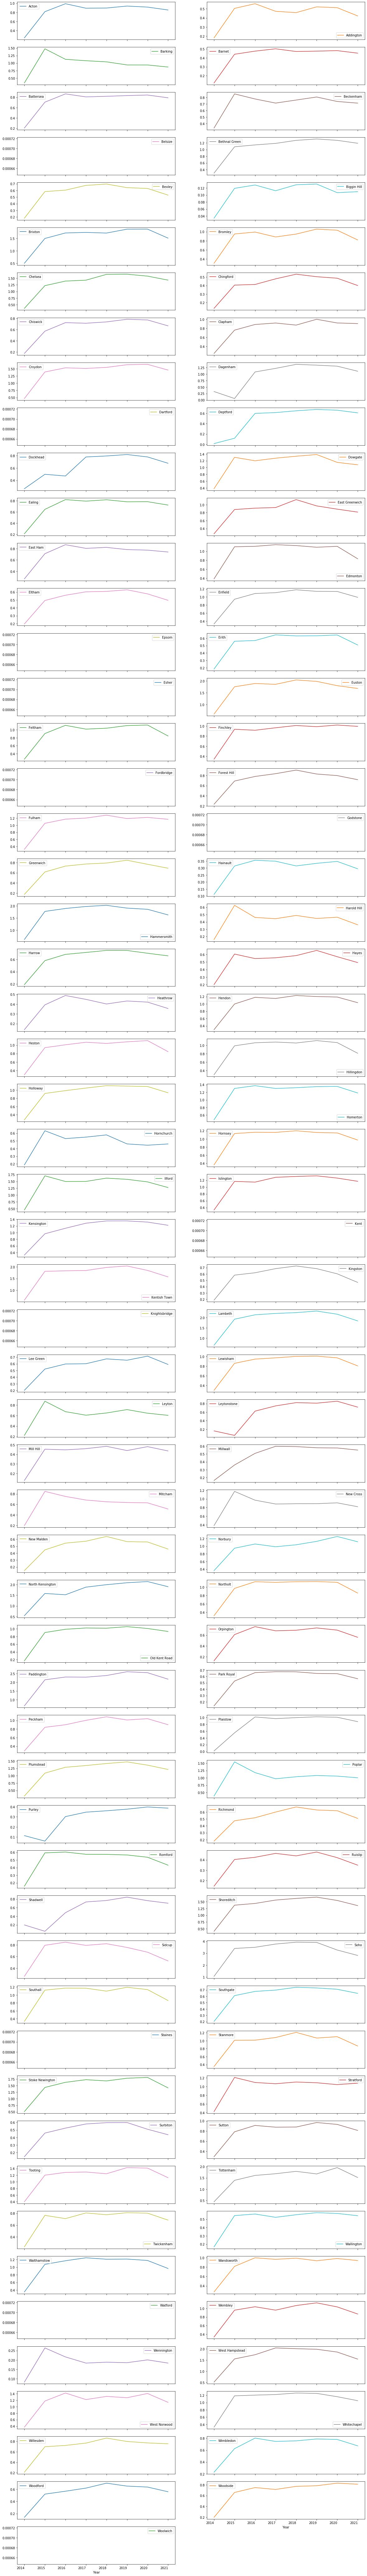

In [286]:
# Let's plot the average values across the LFB stations

dfp = fireeng_station.pivot_table(index='Year', columns='Station', values='Avg Daily Eng Deployed', aggfunc='sum')

ax = dfp.plot(kind='line', subplots=True, figsize=(20, 180), layout=(61, 2), rot=0, legend=True)

Comment: Looks like the LFB stations in Belsize, Dartford, Epsom, Esher, Fordbridge, Godstone, Kent, Knightsbridge, Staines, Watford and Woolwich don't have relevant data in the 2014-2021 period. Let's doublecheck a couple of those stations.

In [287]:
fireeng_station[fireeng_station['Station'] == 'Belsize' ]

Station  Year  Yearly Tot Eng Deployed  Avg Daily Eng Deployed
48  Belsize  2014                        1                0.000685

In [288]:
fireeng_station[fireeng_station['Station'] == 'Fordbridge' ]

Station  Year  Yearly Tot Eng Deployed  Avg Daily Eng Deployed
246  Fordbridge  2021                        1                0.000685

Comment: Let's drop these stations from the dataset as there is no loss of information.

In [289]:
station_to_drop = fireeng_station[fireeng_station['Station'].isin([
                               'Belsize',
                               'Dartford', 
                               'Epsom',
                               'Esher',
                               'Fordbridge',
                               'Godstone',
                               'Kent',
                               'Knightsbridge',
                               'Staines',
                               'Watford',
                               'Woolwich']
                               )].index

fireeng_station.drop(station_to_drop , inplace=True)

Comment: Let's plot again the average values across the LFB stations


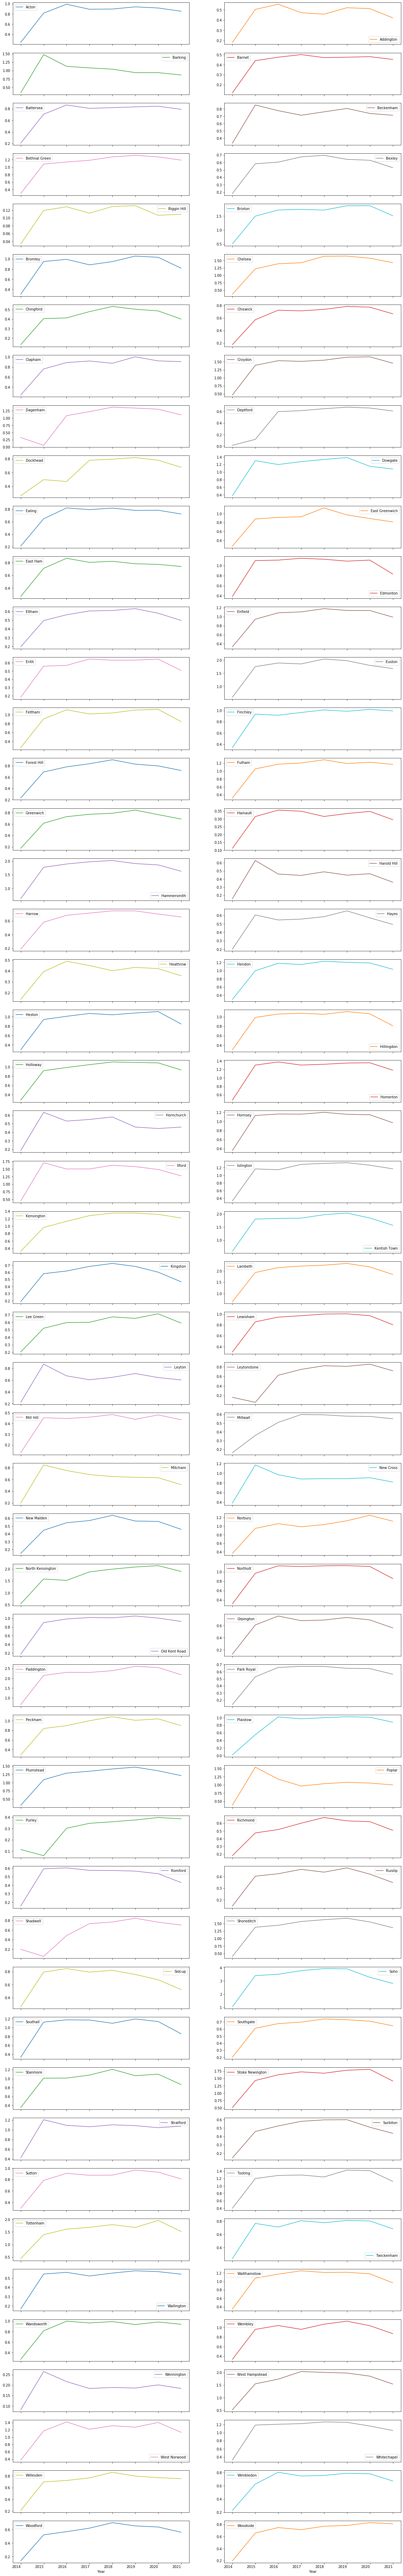

In [290]:
dfp = fireeng_station.pivot_table(index='Year', columns='Station', values='Avg Daily Eng Deployed', aggfunc='sum')

ax = dfp.plot(kind='line', subplots=True, figsize=(20, 180), layout=(61, 2), rot=0, legend=True)

Comment: By the look of the plots a linear regression model is appropriate

## 4. Building the regression model

### 4.1 Preparing the dataset

In [291]:
# Let's slice the dataframe by 'Station'

df_sliced_dict = {}

for station in fireeng_station['Station'].unique():
    df_sliced_dict[station] = fireeng_station[fireeng_station['Station'] == station ]

pp = pprint.PrettyPrinter(indent=1)

pp.pprint(df_sliced_dict)

{'Acton':   Station  Year  Yearly Tot Eng Deployed  Avg Daily Eng Deployed
0   Acton  2014                      351                0.240411
1   Acton  2015                     1191                0.815753
2   Acton  2016                     1446                0.990411
3   Acton  2017                     1302                0.891781
4   Acton  2018                     1308                0.895890
5   Acton  2019                     1371                0.939041
6   Acton  2020                     1338                0.916438
7   Acton  2021                     1245                0.852740,
 'Addington':       Station  Year  Yearly Tot Eng Deployed  Avg Daily Eng Deployed
8   Addington  2014                      266                0.182192
9   Addington  2015                      737                0.504795
10  Addington  2016                      811                0.555479
11  Addington  2017                      690                0.472603
12  Addington  2018                      669 

### 4.2 Application of the regression model to predict the number of fire engines

Let's predict the number of fire engines required in every LFB station for 2022.

Acton
Coefficients
[ 1.04296378e-02 -6.31571833e+01  1.27483733e+05 -8.57759000e+07]


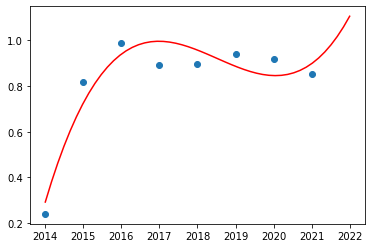

yfit
0    0.292373
1    0.726143
2    0.939868
3    0.996126
4    0.957494
5    0.886550
6    0.845873
7    0.898039
Name: Year, dtype: float64
Actual y= training data
0    0.240411
1    0.815753
2    0.990411
3    0.891781
4    0.895890
5    0.939041
6    0.916438
7    0.852740
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.32002
Coefficient P-Value: 0.14387
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Addington
Coefficients
[ 4.85678709e-03 -2.94114083e+01  5.93691742e+04 -3.99470417e+07]


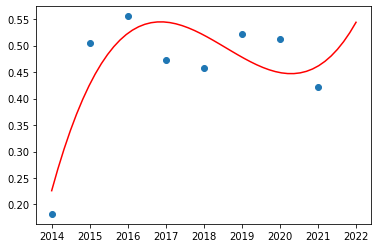

yfit
8     0.226059
9     0.426739
10    0.523159
11    0.544458
12    0.519779
13    0.478260
14    0.449044
15    0.461270
Name: Year, dtype: float64
Actual y= training data
8     0.182192
9     0.504795
10    0.555479
11    0.472603
12    0.458219
13    0.521233
14    0.512329
15    0.421918
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.15834
Coefficient P-Value: 0.32892
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Barking
Coefficients
[ 1.98042063e-02 -1.19900371e+02  2.41970266e+05 -1.62772810e+08]


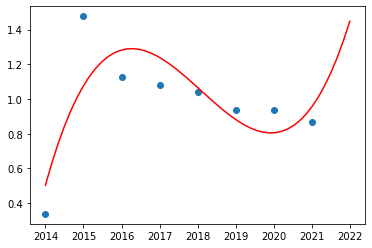

yfit
16    0.502502
17    1.076508
18    1.282627
19    1.239682
20    1.066499
21    0.881904
22    0.804722
23    0.953778
Name: Year, dtype: float64
Actual y= training data
16    0.336986
17    1.477397
18    1.126712
19    1.079452
20    1.041781
21    0.939041
22    0.938356
23    0.868493
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.00151
Coefficient P-Value: 0.92726
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Barnet
Coefficients
[ 5.61436211e-03 -3.39975362e+01  6.86235171e+04 -4.61718204e+07]


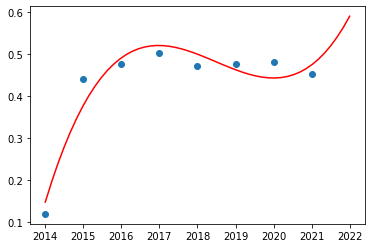

yfit
24    0.147385
25    0.377944
26    0.491069
27    0.520446
28    0.499760
29    0.462698
30    0.442946
31    0.474191
Name: Year, dtype: float64
Actual y= training data
24    0.119178
25    0.440411
26    0.475342
27    0.501370
28    0.471233
29    0.475342
30    0.480822
31    0.452740
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.33805
Coefficient P-Value: 0.13061
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Battersea
Coefficients
[ 9.08225990e-03 -5.49983746e+01  1.11015676e+05 -7.46959880e+07]


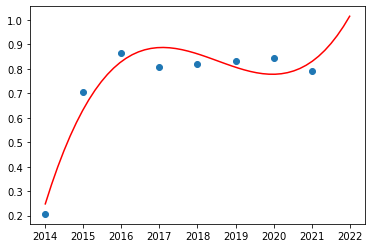

yfit
32    0.247873
33    0.635179
34    0.830259
35    0.887605
36    0.861711
37    0.807070
38    0.778177
39    0.829525
Name: Year, dtype: float64
Actual y= training data
32    0.206849
33    0.706849
34    0.866438
35    0.808219
36    0.819863
37    0.833562
38    0.844521
39    0.791096
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.39168
Coefficient P-Value: 0.09695
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Beckenham
Coefficients
[ 7.34052921e-03 -4.44477230e+01  8.97119151e+04 -6.03572156e+07]


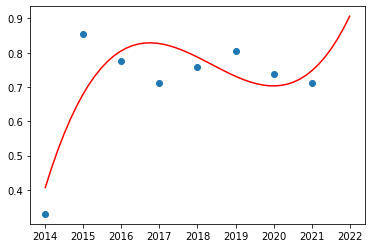

yfit
40    0.406943
41    0.680641
42    0.805892
43    0.826738
44    0.787222
45    0.731388
46    0.703279
47    0.746939
Name: Year, dtype: float64
Actual y= training data
40    0.330137
41    0.854110
42    0.776027
43    0.713014
44    0.759589
45    0.806164
46    0.737671
47    0.712329
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.16275
Coefficient P-Value: 0.32165
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Bethnal Green
Coefficients
[ 9.50083043e-03 -5.75448680e+01  1.16179679e+05 -7.81865921e+07]


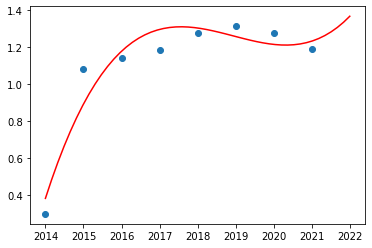

yfit
49    0.381434
50    0.892126
51    1.178122
52    1.296427
53    1.304046
54    1.257983
55    1.215245
56    1.232835
Name: Year, dtype: float64
Actual y= training data
49    0.297260
50    1.082877
51    1.139041
52    1.184247
53    1.274658
54    1.316438
55    1.275342
56    1.188356
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.47367
Coefficient P-Value: 0.05915
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Bexley
Coefficients
[ 4.73225386e-03 -2.86681896e+01  5.78909671e+04 -3.89672394e+07]


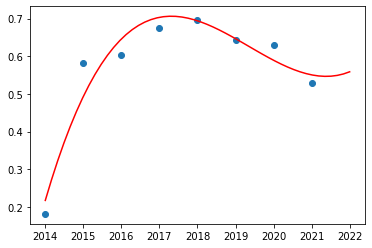

yfit
57    0.217321
58    0.493238
59    0.645726
60    0.703177
61    0.693985
62    0.646544
63    0.589247
64    0.550488
Name: Year, dtype: float64
Actual y= training data
57    0.181507
58    0.582192
59    0.604110
60    0.675342
61    0.695890
62    0.641781
63    0.629452
64    0.529452
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.24727
Coefficient P-Value: 0.20993
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Biggin Hill
Coefficients
[ 1.32143353e-03 -8.00251006e+00  1.61542042e+04 -1.08698448e+07]


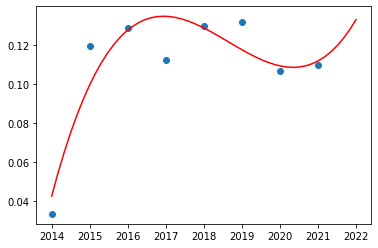

yfit
65    0.042632
66    0.099523
67    0.127525
68    0.134567
69    0.128577
70    0.117485
71    0.109218
72    0.111706
Name: Year, dtype: float64
Actual y= training data
65    0.033562
66    0.119178
67    0.128767
68    0.112329
69    0.129452
70    0.131507
71    0.106849
72    0.109589
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.20540
Coefficient P-Value: 0.25942
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Brixton
Coefficients
[ 1.05766571e-02 -6.40779984e+01  1.29404036e+05 -8.71094102e+07]


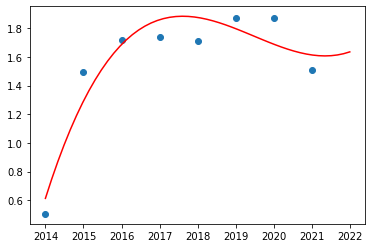

yfit
73    0.613232
74    1.291413
75    1.685382
76    1.858599
77    1.874523
78    1.796614
79    1.688332
80    1.613138
Name: Year, dtype: float64
Actual y= training data
73    0.504795
74    1.497260
75    1.717123
76    1.739041
77    1.713699
78    1.868493
79    1.870548
80    1.510274
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.37267
Coefficient P-Value: 0.10796
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Bromley
Coefficients
[ 6.41345084e-03 -3.88499292e+01  7.84453285e+04 -5.27985902e+07]


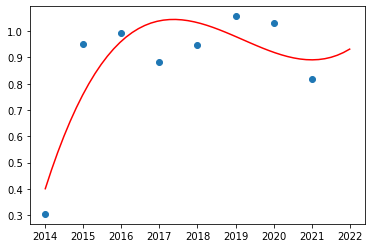

yfit
81    0.400695
82    0.762044
83    0.962155
84    1.039510
85    1.032588
86    0.979870
87    0.919838
88    0.890971
Name: Year, dtype: float64
Actual y= training data
81    0.304795
82    0.950000
83    0.992466
84    0.884247
85    0.947945
86    1.056849
87    1.032877
88    0.818493
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.26362
Coefficient P-Value: 0.19311
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Chelsea
Coefficients
[ 8.01335350e-03 -4.85550173e+01  9.80691335e+04 -6.60250847e+07]


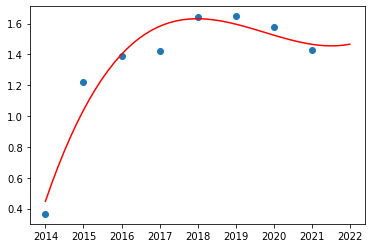

yfit
89    0.447624
90    1.038488
91    1.400762
92    1.582525
93    1.631858
94    1.596841
95    1.525553
96    1.466075
Name: Year, dtype: float64
Actual y= training data
89    0.365753
90    1.218493
91    1.389726
92    1.423973
93    1.641781
94    1.647945
95    1.576027
96    1.426027
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.50684
Coefficient P-Value: 0.04760
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Chingford
Coefficients
[ 1.70368105e-03 -1.03306302e+01  2.08805974e+04 -1.40681372e+07]


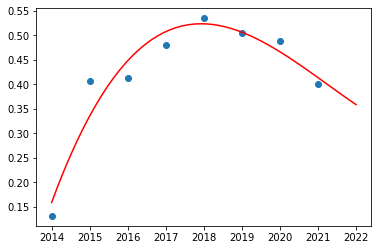

yfit
97     0.158396
98     0.334936
99     0.447720
100    0.506969
101    0.522907
102    0.505754
103    0.465733
104    0.413066
Name: Year, dtype: float64
Actual y= training data
97     0.130822
98     0.405479
99     0.413014
100    0.479452
101    0.534247
102    0.504795
103    0.486986
104    0.400685
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.36500
Coefficient P-Value: 0.11268
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Chiswick
Coefficients
[ 4.92078290e-03 -2.98100403e+01  6.01962421e+04 -4.05186203e+07]


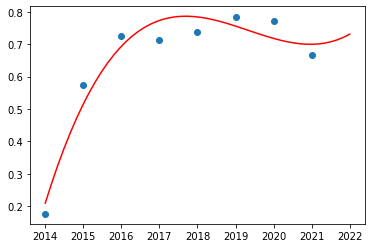

yfit
105    0.209548
106    0.515375
107    0.693388
108    0.773110
109    0.784066
110    0.755780
111    0.717779
112    0.699585
Name: Year, dtype: float64
Actual y= training data
105    0.176027
106    0.572603
107    0.724658
108    0.713699
109    0.737671
110    0.784247
111    0.772603
112    0.667123
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.45618
Coefficient P-Value: 0.06603
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Clapham
Coefficients
[ 8.01508151e-03 -4.85403741e+01  9.79888945e+04 -6.59369955e+07]


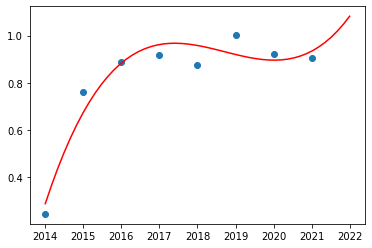

yfit
113    0.287817
114    0.674864
115    0.883498
116    0.961810
117    0.957890
118    0.919829
119    0.895717
120    0.933645
Name: Year, dtype: float64
Actual y= training data
113    0.244521
114    0.761644
115    0.886986
116    0.919178
117    0.873288
118    1.002055
119    0.920548
120    0.906849
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.48583
Coefficient P-Value: 0.05469
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Croydon
Coefficients
[ 1.19568976e-02 -7.24187112e+01  1.46204786e+05 -9.83899856e+07]


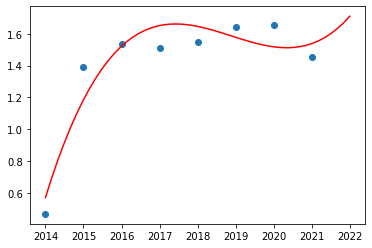

yfit
121    0.569344
122    1.184552
123    1.521230
124    1.651119
125    1.645962
126    1.577498
127    1.517470
128    1.537619
Name: Year, dtype: float64
Actual y= training data
121    0.467123
122    1.389726
123    1.533562
124    1.513014
125    1.549315
126    1.641781
127    1.654110
128    1.456164
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.42010
Coefficient P-Value: 0.08218
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Dagenham
Coefficients
[-7.68645640e-03  4.64698964e+01 -9.36471161e+04  6.29063204e+07]


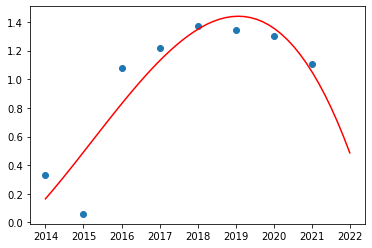

yfit
129    0.164840
130    0.490933
131    0.827560
132    1.128604
133    1.347945
134    1.439465
135    1.357045
136    1.054566
Name: Year, dtype: float64
Actual y= training data
129    0.328082
130    0.059589
131    1.080822
132    1.217808
133    1.371918
134    1.341781
135    1.302740
136    1.108219
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.54308
Coefficient P-Value: 0.03700
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Deptford
Coefficients
[ 2.04960369e-03 -1.24348863e+01  2.51472879e+04 -1.69518807e+07]


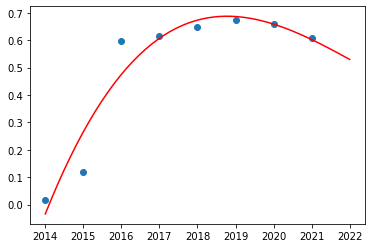

yfit
139   -0.033935
140    0.265678
141    0.475227
142    0.607009
143    0.673323
144    0.686466
145    0.658735
146    0.602428
Name: Year, dtype: float64
Actual y= training data
139    0.015068
140    0.118493
141    0.597945
142    0.613699
143    0.647945
144    0.673973
145    0.659589
146    0.608219
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.61325
Coefficient P-Value: 0.02154
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Dockhead
Coefficients
[-2.54946653e-03  1.54075787e+01 -3.10381638e+04  2.08417510e+07]


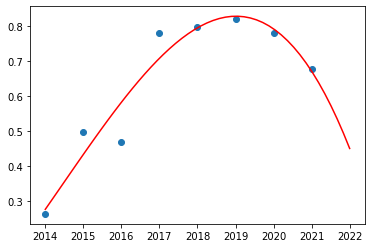

yfit
147    0.277397
148    0.433774
149    0.582257
150    0.707551
151    0.794357
152    0.827381
153    0.791324
154    0.670890
Name: Year, dtype: float64
Actual y= training data
147    0.264384
148    0.497945
149    0.470548
150    0.779452
151    0.795890
152    0.819178
153    0.780137
154    0.677397
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.59741
Coefficient P-Value: 0.02451
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Dowgate
Coefficients
[ 1.06458429e-02 -6.44824270e+01  1.30191029e+05 -8.76191631e+07]


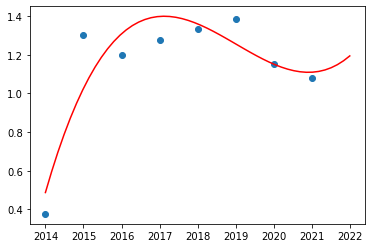

yfit
155    0.486821
156    1.026342
157    1.309250
158    1.399419
159    1.360725
160    1.257042
161    1.152246
162    1.110212
Name: Year, dtype: float64
Actual y= training data
155    0.376027
156    1.301370
157    1.199315
158    1.275342
159    1.333562
160    1.383562
161    1.152055
162    1.080822
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.18721
Coefficient P-Value: 0.28429
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Ealing
Coefficients
[ 7.83001129e-03 -4.74202570e+01  9.57290826e+04 -6.44172772e+07]


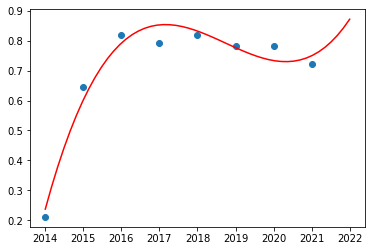

yfit
163    0.237049
164    0.602418
165    0.792110
166    0.853105
167    0.832382
168    0.776921
169    0.733704
170    0.749710
Name: Year, dtype: float64
Actual y= training data
163    0.210959
164    0.646575
165    0.820548
166    0.793151
167    0.817808
168    0.781507
169    0.783562
170    0.723288
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.35450
Coefficient P-Value: 0.11941
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
East Greenwich
Coefficients
[ 6.96865959e-03 -4.22168737e+01  8.52513349e+04 -5.73845000e+07]


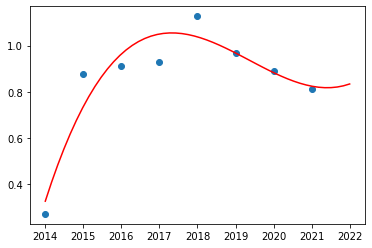

yfit
171    0.326401
172    0.736459
173    0.963863
174    1.050427
175    1.037962
176    0.968280
177    0.883193
178    0.824512
Name: Year, dtype: float64
Actual y= training data
171    0.271233
172    0.878082
173    0.913699
174    0.928082
175    1.127397
176    0.969863
177    0.888356
178    0.814384
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.24108
Coefficient P-Value: 0.21664
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
East Ham
Coefficients
[ 8.96291554e-03 -5.42751174e+01  1.09554623e+05 -7.37121546e+07]


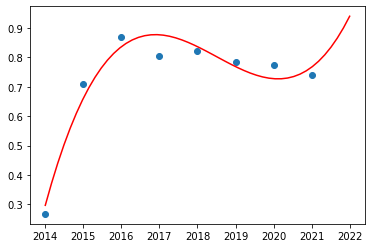

yfit
179    0.297043
180    0.661017
181    0.836405
182    0.876985
183    0.836534
184    0.768830
185    0.727649
186    0.766770
Name: Year, dtype: float64
Actual y= training data
179    0.267808
180    0.710959
181    0.869178
182    0.804795
183    0.821918
184    0.782877
185    0.773288
186    0.740411
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.26999
Coefficient P-Value: 0.18690
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Edmonton
Coefficients
[ 8.29355209e-03 -5.02398136e+01  1.01445717e+05 -6.82806525e+07]


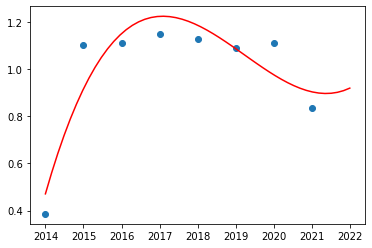

yfit
187    0.470652
188    0.915353
189    1.149472
190    1.222770
191    1.185009
192    1.085949
193    0.975351
194    0.902979
Name: Year, dtype: float64
Actual y= training data
187    0.385616
188    1.101370
189    1.110959
190    1.147260
191    1.128082
192    1.090411
193    1.110959
194    0.832877
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.11767
Coefficient P-Value: 0.40550
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Eltham
Coefficients
[ 2.97149573e-03 -1.80070751e+01  3.63738601e+04 -2.44914077e+07]


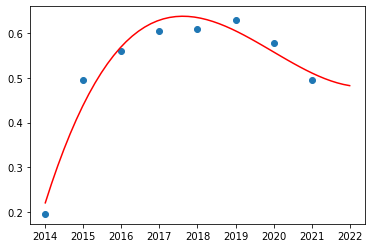

yfit
195    0.221254
196    0.439776
197    0.569532
198    0.628351
199    0.634060
200    0.604489
201    0.557468
202    0.510824
Name: Year, dtype: float64
Actual y= training data
195    0.196575
196    0.493836
197    0.560274
198    0.603425
199    0.608904
200    0.629452
201    0.577397
202    0.495890
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.32141
Coefficient P-Value: 0.14282
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Enfield
Coefficients
[ 7.74353084e-03 -4.69080294e+01  9.47182705e+04 -6.37527226e+07]


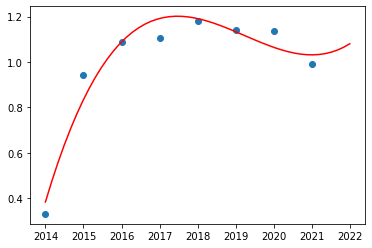

yfit
203    0.384018
204    0.834540
205    1.088291
206    1.191732
207    1.191324
208    1.133529
209    1.064808
210    1.031621
Name: Year, dtype: float64
Actual y= training data
203    0.331507
204    0.944521
205    1.086986
206    1.107534
207    1.179452
208    1.140411
209    1.137671
210    0.991781
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.37389
Coefficient P-Value: 0.10722
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Erith
Coefficients
[ 3.63740148e-03 -2.20387784e+01  4.45104572e+04 -2.99650389e+07]


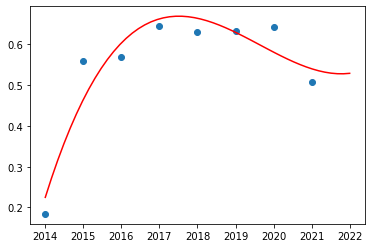

yfit
212    0.224907
213    0.464972
214    0.603665
215    0.662809
216    0.664229
217    0.629750
218    0.581196
219    0.540390
Name: Year, dtype: float64
Actual y= training data
212    0.184247
213    0.558904
214    0.568493
215    0.645205
216    0.630822
217    0.632192
218    0.643836
219    0.508219
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.29342
Coefficient P-Value: 0.16553
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Euston
Coefficients
[ 1.55648955e-02 -9.42755082e+01  1.90339956e+05 -1.28097145e+08]


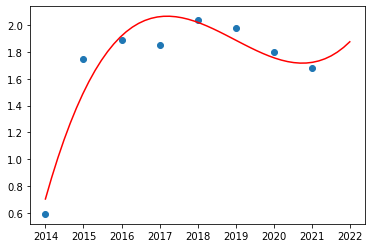

yfit
222    0.704805
223    1.497286
224    1.918336
225    2.061346
226    2.019704
227    1.886801
228    1.756025
229    1.720766
Name: Year, dtype: float64
Actual y= training data
222    0.593836
223    1.748630
224    1.886301
225    1.851370
226    2.036986
227    1.975342
228    1.795890
229    1.676712
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.27454
Coefficient P-Value: 0.18257
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Feltham
Coefficients
[ 7.55327255e-03 -4.57589373e+01  9.24049063e+04 -6.22002960e+07]


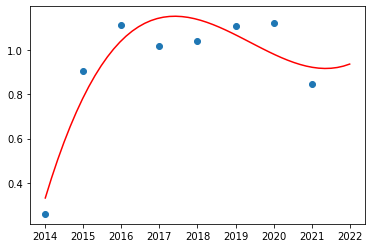

yfit
230    0.332763
231    0.786758
232    1.041944
233    1.143640
234    1.137166
235    1.067841
236    0.980985
237    0.921918
Name: Year, dtype: float64
Actual y= training data
230    0.260959
231    0.906849
232    1.113014
233    1.017808
234    1.041096
235    1.106849
236    1.121233
237    0.845205
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.27553
Coefficient P-Value: 0.18164
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Finchley
Coefficients
[ 8.86086863e-03 -5.36559007e+01  1.08302193e+05 -7.28677858e+07]


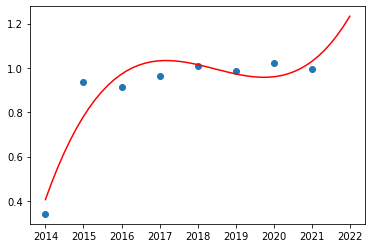

yfit
238    0.406248
239    0.781056
240    0.971965
241    1.032140
242    1.014745
243    0.972947
244    0.959909
245    1.028798
Name: Year, dtype: float64
Actual y= training data
238    0.341781
239    0.935616
240    0.915753
241    0.965068
242    1.010274
243    0.986301
244    1.019863
245    0.993151
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.45374
Coefficient P-Value: 0.06704
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Forest Hill
Coefficients
[ 5.82018778e-03 -3.52588253e+01  7.11995155e+04 -4.79252721e+07]


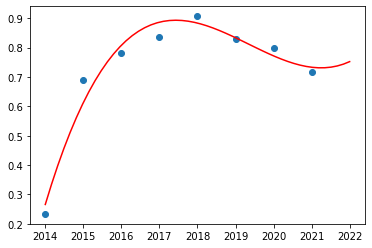

yfit
247    0.265743
248    0.612646
249    0.807969
250    0.886632
251    0.883557
252    0.833665
253    0.771878
254    0.733115
Name: Year, dtype: float64
Actual y= training data
247    0.233562
248    0.691096
249    0.781507
250    0.836301
251    0.906849
252    0.829452
253    0.798630
254    0.717808
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.33186
Coefficient P-Value: 0.13504
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Fulham
Coefficients
[ 1.19707336e-02 -7.24935408e+01  1.46337754e+05 -9.84672877e+07]


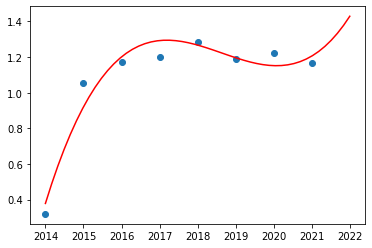

yfit
255    0.378674
256    0.920452
257    1.201317
258    1.293093
259    1.267605
260    1.196678
261    1.152135
262    1.205801
Name: Year, dtype: float64
Actual y= training data
255    0.319863
256    1.054795
257    1.172603
258    1.203425
259    1.284932
260    1.189726
261    1.221918
262    1.168493
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.41527
Coefficient P-Value: 0.08456
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Greenwich
Coefficients
[ 5.00726425e-03 -3.03369423e+01  6.12662750e+04 -4.12429304e+07]


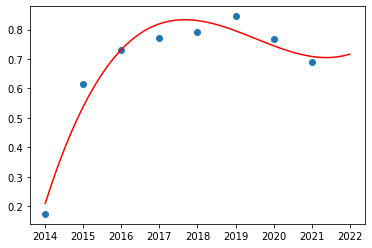

yfit
264    0.210067
265    0.539255
266    0.732383
267    0.819495
268    0.830635
269    0.795846
270    0.745171
271    0.708655
Name: Year, dtype: float64
Actual y= training data
264    0.173973
265    0.615068
266    0.730137
267    0.771918
268    0.790411
269    0.845205
270    0.766438
271    0.688356
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.41744
Coefficient P-Value: 0.08348
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Hainault
Coefficients
[ 3.45924963e-03 -2.09483038e+01  4.22857735e+04 -2.84523503e+07]


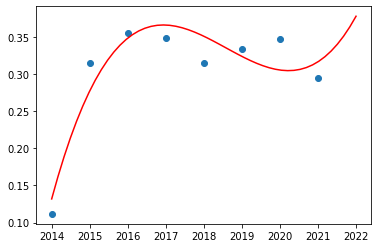

yfit
272    0.131829
273    0.277282
274    0.348455
275    0.366105
276    0.350986
277    0.323854
278    0.305465
279    0.316573
Name: Year, dtype: float64
Actual y= training data
272    0.111644
273    0.314384
274    0.355479
275    0.348630
276    0.315068
277    0.333562
278    0.347260
279    0.294521
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.24101
Coefficient P-Value: 0.21671
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Hammersmith
Coefficients
[ 1.60872413e-02 -9.74394849e+01  1.96728267e+05 -1.32396629e+08]


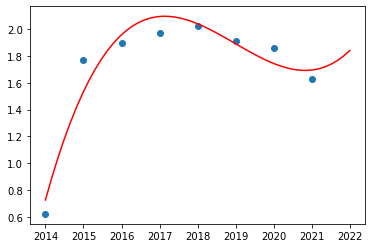

yfit
280    0.725063
281    1.533615
282    1.957945
283    2.094576
284    2.040030
285    1.890832
286    1.743505
287    1.694573
Name: Year, dtype: float64
Actual y= training data
280    0.621233
281    1.772603
282    1.893151
283    1.974658
284    2.021918
285    1.908219
286    1.859589
287    1.628767
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.23450
Coefficient P-Value: 0.22399
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Harold Hill
Coefficients
[ 5.53480103e-03 -3.35152426e+01  6.76489544e+04 -4.55153797e+07]


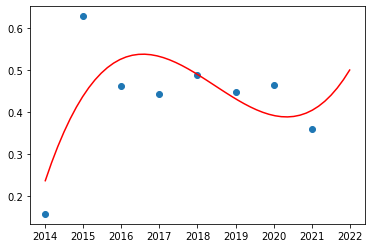

yfit
288    0.237090
289    0.439049
290    0.526266
291    0.531952
292    0.489314
293    0.431562
294    0.391904
295    0.403549
Name: Year, dtype: float64
Actual y= training data
288    0.158219
289    0.627397
290    0.460959
291    0.443836
292    0.488356
293    0.447260
294    0.464384
295    0.360274
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.01748
Coefficient P-Value: 0.75498
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Harrow
Coefficients
[ 5.35664821e-03 -3.24470306e+01  6.55141716e+04 -4.40934423e+07]


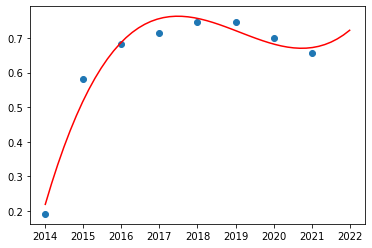

yfit
296    0.218784
297    0.519378
298    0.687788
299    0.756154
300    0.756615
301    0.721312
302    0.682383
303    0.671970
Name: Year, dtype: float64
Actual y= training data
296    0.191096
297    0.580137
298    0.681507
299    0.713014
300    0.745890
301    0.745205
302    0.700000
303    0.657534
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.41989
Coefficient P-Value: 0.08228
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Hayes
Coefficients
[ 3.45579176e-03 -2.09355616e+01  4.22765928e+04 -2.84572972e+07]


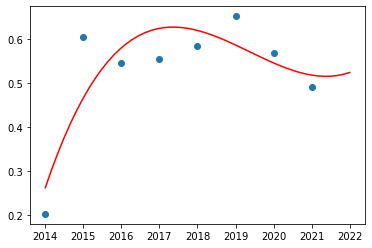

yfit
304    0.261831
305    0.466631
306    0.580831
307    0.625165
308    0.620367
309    0.587173
310    0.546317
311    0.518535
Name: Year, dtype: float64
Actual y= training data
304    0.202055
305    0.604795
306    0.545205
307    0.555479
308    0.584247
309    0.652740
310    0.569863
311    0.492466
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.21544
Coefficient P-Value: 0.24662
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Heathrow
Coefficients
[ 4.83430122e-03 -2.92759854e+01  5.90973139e+04 -3.97651262e+07]


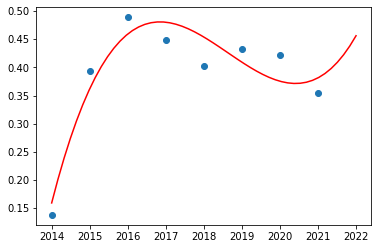

yfit
312    0.159600
313    0.362077
314    0.459285
315    0.480230
316    0.453918
317    0.409355
318    0.375546
319    0.381497
Name: Year, dtype: float64
Actual y= training data
312    0.138356
313    0.393151
314    0.489041
315    0.449315
316    0.402055
317    0.432877
318    0.421233
319    0.355479
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.15405
Coefficient P-Value: 0.33617
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Hendon
Coefficients
[ 9.63574049e-03 -5.83652842e+01  1.17842663e+05 -7.93101772e+07]


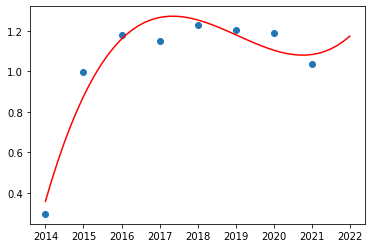

yfit
320    0.358728
321    0.876594
322    1.159994
323    1.266742
324    1.254654
325    1.181542
326    1.105223
327    1.083510
Name: Year, dtype: float64
Actual y= training data
320    0.296575
321    0.999315
322    1.180822
323    1.150685
324    1.231507
325    1.203425
326    1.189726
327    1.034932
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.34808
Coefficient P-Value: 0.12368
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Heston
Coefficients
[ 6.53279385e-03 -3.95799704e+01  7.99337631e+04 -5.38100415e+07]


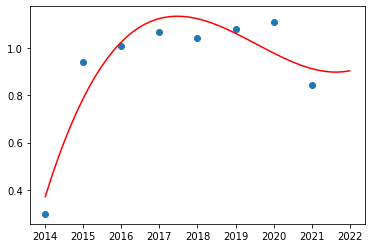

yfit
328    0.371389
329    0.788229
330    1.026606
331    1.125716
332    1.124757
333    1.062925
334    0.979417
335    0.913429
Name: Year, dtype: float64
Actual y= training data
328    0.297945
329    0.941096
330    1.008904
331    1.069178
332    1.041096
333    1.079452
334    1.108904
335    0.845890
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.28172
Coefficient P-Value: 0.17592
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Hillingdon
Coefficients
[ 7.29901788e-03 -4.42209375e+01  8.93037495e+04 -6.01159432e+07]


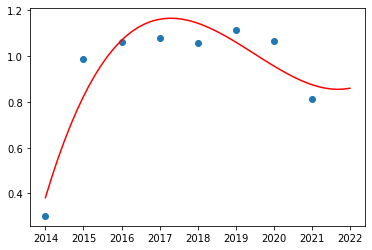

yfit
336    0.381808
337    0.823562
338    1.068567
339    1.160618
340    1.143508
341    1.061032
342    0.956983
343    0.875156
Name: Year, dtype: float64
Actual y= training data
336    0.302055
337    0.988356
338    1.060274
339    1.077397
340    1.054795
341    1.112329
342    1.064384
343    0.811644
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.19167
Coefficient P-Value: 0.27799
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Holloway
Coefficients
[ 7.07243679e-03 -4.28448791e+01  8.65181403e+04 -5.82363071e+07]


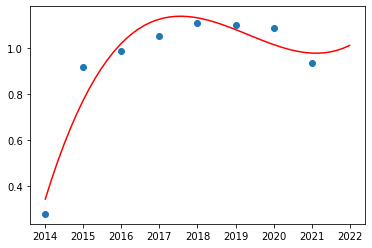

yfit
344    0.342663
345    0.773082
346    1.019503
347    1.124361
348    1.130091
349    1.079127
350    1.013905
351    0.976858
Name: Year, dtype: float64
Actual y= training data
344    0.278082
345    0.918493
346    0.986986
347    1.049315
348    1.107534
349    1.097260
350    1.087671
351    0.934247
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.38369
Coefficient P-Value: 0.10146
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Homerton
Coefficients
[ 1.21021860e-02 -7.32903066e+01  1.47947526e+05 -9.95513898e+07]


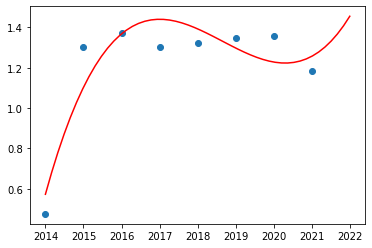

yfit
352    0.572728
353    1.102912
354    1.367912
355    1.440341
356    1.392813
357    1.297939
358    1.228334
359    1.256611
Name: Year, dtype: float64
Actual y= training data
352    0.475342
353    1.301370
354    1.374658
355    1.301370
356    1.320548
357    1.349315
358    1.355479
359    1.181507
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.24846
Coefficient P-Value: 0.20866
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Hornchurch
Coefficients
[ 8.20188134e-03 -4.96597358e+01  1.00224461e+05 -6.74250768e+07]


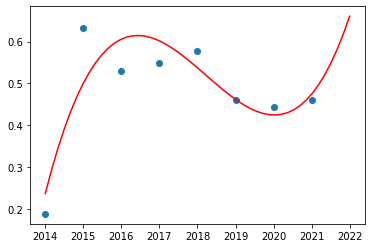

yfit
360    0.236426
361    0.500531
362    0.605909
363    0.601773
364    0.537333
365    0.461801
366    0.424388
367    0.474305
Name: Year, dtype: float64
Actual y= training data
360    0.187671
361    0.632192
362    0.530137
363    0.549315
364    0.578082
365    0.460959
366    0.443836
367    0.460274
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.02894
Coefficient P-Value: 0.68714
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Hornsey
Coefficients
[ 1.04123425e-02 -6.30633156e+01  1.27316166e+05 -8.56778760e+07]


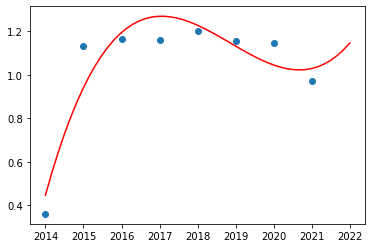

yfit
368    0.446264
369    0.941433
370    1.195191
371    1.270013
372    1.228373
373    1.132745
374    1.045603
375    1.029421
Name: Year, dtype: float64
Actual y= training data
368    0.360274
369    1.131507
370    1.163014
371    1.159589
372    1.200000
373    1.156849
374    1.146575
375    0.971233
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.20517
Coefficient P-Value: 0.25973
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Ilford
Coefficients
[ 1.50650355e-02 -9.12380580e+01  1.84187560e+05 -1.23943267e+08]


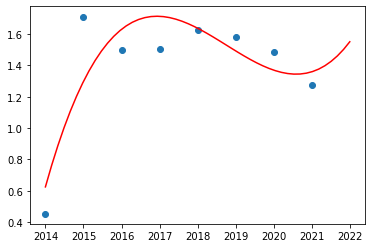

yfit
376    0.624523
377    1.296949
378    1.629538
379    1.712680
380    1.636765
381    1.492184
382    1.369326
383    1.358583
Name: Year, dtype: float64
Actual y= training data
376    0.452055
377    1.706849
378    1.499315
379    1.501370
380    1.622603
381    1.578082
382    1.484247
383    1.276027
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.13402
Coefficient P-Value: 0.37245
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Islington
Coefficients
[ 1.01615469e-02 -6.15473283e+01  1.24261634e+05 -8.36263971e+07]


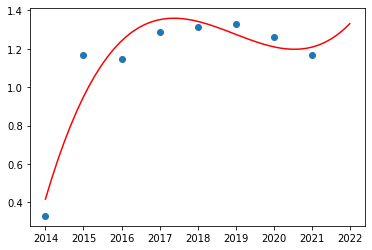

yfit
384    0.416906
385    0.949781
386    1.241102
387    1.351838
388    1.342959
389    1.275434
390    1.210232
391    1.208323
Name: Year, dtype: float64
Actual y= training data
384    0.329452
385    1.165753
386    1.145205
387    1.284932
388    1.310959
389    1.328767
390    1.263014
391    1.168493
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.37802
Coefficient P-Value: 0.10476
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Kensington
Coefficients
[ 6.95828089e-03 -4.21597399e+01  8.51475877e+04 -5.73225133e+07]


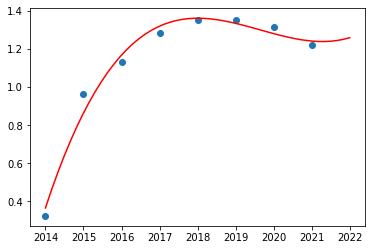

yfit
392    0.365608
393    0.863558
394    1.167644
395    1.319616
396    1.361223
397    1.334216
398    1.280343
399    1.241355
Name: Year, dtype: float64
Actual y= training data
392    0.323973
393    0.963699
394    1.129452
395    1.281507
396    1.350000
397    1.350685
398    1.315068
399    1.219178
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.54439
Coefficient P-Value: 0.03666
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Kentish Town
Coefficients
[ 1.24498425e-02 -7.54242468e+01  1.52312800e+05 -1.02527439e+08]


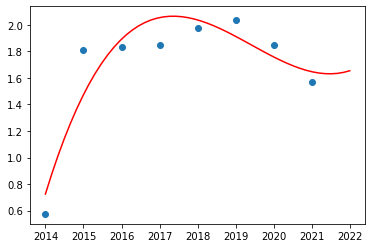

yfit
401    0.724928
402    1.472704
403    1.890582
404    2.053260
405    2.035439
406    1.911816
407    1.757091
408    1.645963
Name: Year, dtype: float64
Actual y= training data
401    0.575342
402    1.808904
403    1.831507
404    1.843836
405    1.975342
406    2.037671
407    1.848630
408    1.570548
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.24185
Coefficient P-Value: 0.21580
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Kingston
Coefficients
[ 3.21364358e-03 -1.94814894e+01  3.93662666e+04 -2.65157503e+07]


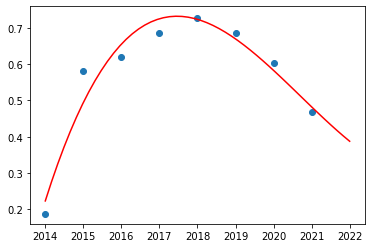

yfit
409    0.223392
410    0.494039
411    0.654658
412    0.724532
413    0.722941
414    0.669168
415    0.582494
416    0.482202
Name: Year, dtype: float64
Actual y= training data
409    0.187671
410    0.582192
411    0.619178
412    0.684247
413    0.726027
414    0.684247
415    0.602740
416    0.467123
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.14881
Coefficient P-Value: 0.34525
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Lambeth
Coefficients
[ 1.44631244e-02 -8.76223152e+01  1.76947992e+05 -1.19111820e+08]


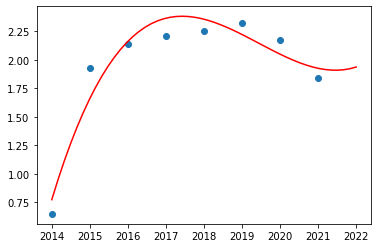

yfit
418    0.773080
419    1.660129
420    2.161721
421    2.364636
422    2.355652
423    2.221547
424    2.049102
425    1.925094
Name: Year, dtype: float64
Actual y= training data
418    0.647945
419    1.926027
420    2.141096
421    2.208219
422    2.249315
423    2.324658
424    2.171233
425    1.842466
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.29532
Coefficient P-Value: 0.16390
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Lee Green
Coefficients
[ 2.85042229e-03 -1.72720765e+01  3.48865742e+04 -2.34882416e+07]


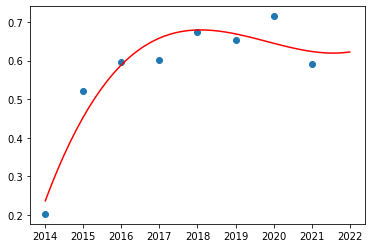

yfit
426    0.236737
427    0.454157
428    0.589029
429    0.658456
430    0.679541
431    0.669386
432    0.645093
433    0.623765
Name: Year, dtype: float64
Actual y= training data
426    0.202740
427    0.521233
428    0.597260
429    0.601370
430    0.673973
431    0.654110
432    0.715068
433    0.590411
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.51449
Coefficient P-Value: 0.04519
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Lewisham
Coefficients
[ 6.16611325e-03 -3.73569179e+01  7.54412499e+04 -5.07837774e+07]


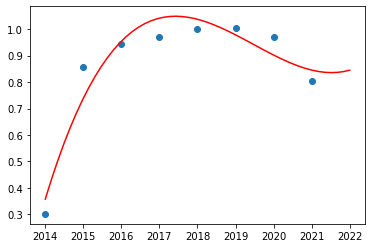

yfit
434    0.357316
435    0.738626
436    0.954409
437    1.041662
438    1.037382
439    0.978566
440    0.902209
441    0.845309
Name: Year, dtype: float64
Actual y= training data
434    0.301370
435    0.857534
436    0.944521
437    0.970548
438    1.000685
439    1.005479
440    0.970548
441    0.804795
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.28423
Coefficient P-Value: 0.17364
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Leyton
Coefficients
[ 8.59623759e-03 -5.20473598e+01  1.05043078e+05 -7.06666686e+07]


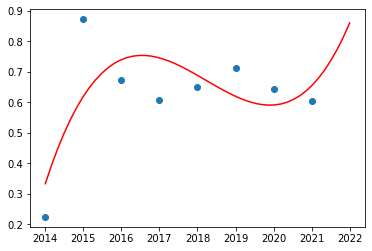

yfit
442    0.332285
443    0.618900
444    0.739307
445    0.745084
446    0.687809
447    0.619060
448    0.590413
449    0.653446
Name: Year, dtype: float64
Actual y= training data
442    0.223288
443    0.871918
444    0.673973
445    0.606849
446    0.648630
447    0.713014
448    0.644521
449    0.604110
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.07240
Coefficient P-Value: 0.51931
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Leytonstone
Coefficients
[-4.14937205e-03  2.50837376e+01 -5.05450961e+04  3.39502294e+07]


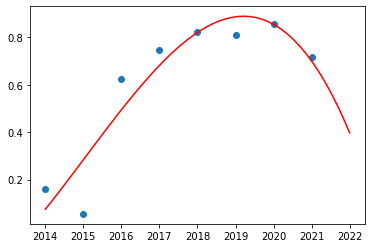

yfit
450    0.074990
451    0.284075
452    0.494727
453    0.682049
454    0.821147
455    0.887123
456    0.855081
457    0.700124
Name: Year, dtype: float64
Actual y= training data
450    0.160959
451    0.055479
452    0.624658
453    0.747260
454    0.823973
455    0.811644
456    0.856849
457    0.718493
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.63342
Coefficient P-Value: 0.01814
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Mill Hill
Coefficients
[ 5.08163805e-03 -3.07715768e+01  6.21118234e+04 -4.17904750e+07]


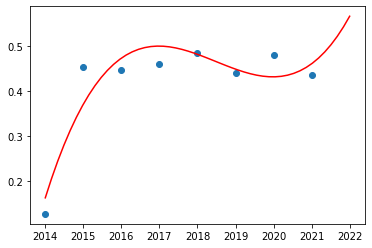

yfit
458    0.162568
459    0.371226
460    0.473734
461    0.500583
462    0.482262
463    0.449260
464    0.432069
465    0.461177
Name: Year, dtype: float64
Actual y= training data
458    0.126712
459    0.454795
460    0.447945
461    0.460274
462    0.484932
463    0.440411
464    0.481507
465    0.436301
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.32135
Coefficient P-Value: 0.14286
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Millwall
Coefficients
[ 2.87463577e-03 -1.74183595e+01  3.51811580e+04 -2.36859851e+07]


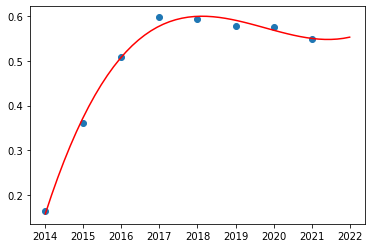

yfit
466    0.156974
467    0.374112
468    0.508877
469    0.578518
470    0.600282
471    0.591416
472    0.569169
473    0.550789
Name: Year, dtype: float64
Actual y= training data
466    0.163014
467    0.360274
468    0.508219
469    0.597945
470    0.594521
471    0.579452
472    0.576712
473    0.550000
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.57493
Coefficient P-Value: 0.02923
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Mitcham
Coefficients
[ 1.06077902e-02 -6.42297387e+01  1.29636042e+05 -8.72155133e+07]


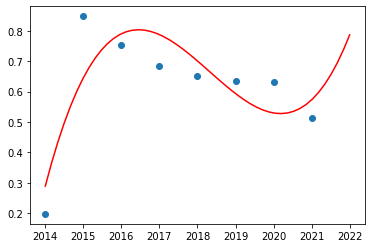

yfit
474    0.289332
475    0.645504
476    0.790381
477    0.787612
478    0.700842
479    0.593719
480    0.529888
481    0.572997
Name: Year, dtype: float64
Actual y= training data
474    0.197945
475    0.847945
476    0.752055
477    0.683562
478    0.650000
479    0.636301
480    0.630137
481    0.512329
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.01204
Coefficient P-Value: 0.79593
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
New Cross
Coefficients
[ 1.24619488e-02 -7.54494000e+01  1.52266387e+05 -1.02430836e+08]


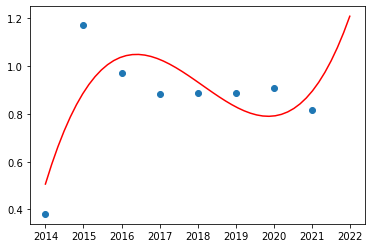

yfit
482    0.506507
483    0.889335
484    1.038324
485    1.028245
486    0.933872
487    0.829974
488    0.791324
489    0.892694
Name: Year, dtype: float64
Actual y= training data
482    0.381507
483    1.173973
484    0.969863
485    0.881507
486    0.887671
487    0.889041
488    0.908219
489    0.818493
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.03843
Coefficient P-Value: 0.64173
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
New Malden
Coefficients
[ 3.13580999e-03 -1.90040211e+01  3.83901094e+04 -2.58506379e+07]


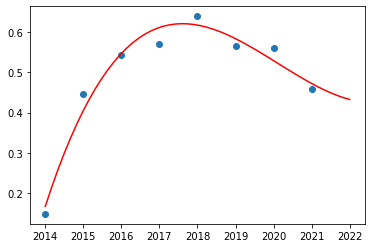

yfit
490    0.167331
491    0.405119
492    0.546808
493    0.611212
494    0.617147
495    0.583427
496    0.528866
497    0.472281
Name: Year, dtype: float64
Actual y= training data
490    0.148630
491    0.446575
492    0.543151
493    0.571233
494    0.639041
495    0.565068
496    0.560274
497    0.458219
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.30318
Coefficient P-Value: 0.15728
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Norbury
Coefficients
[ 7.82482368e-03 -4.73842153e+01  9.56470341e+04 -6.43558448e+07]


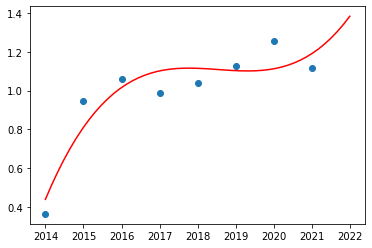

yfit
498    0.438844
499    0.810366
500    1.015576
501    1.101422
502    1.114854
503    1.102820
504    1.112270
505    1.190152
Name: Year, dtype: float64
Actual y= training data
498    0.363699
499    0.947945
500    1.057534
501    0.985616
502    1.036986
503    1.126027
504    1.253425
505    1.115068
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.58573
Coefficient P-Value: 0.02689
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
North Kensington
Coefficients
[ 6.14881859e-03 -3.72715913e+01  7.53082576e+04 -5.07207488e+07]


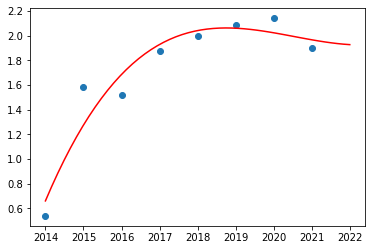

yfit
506    0.661208
507    1.274953
508    1.684731
509    1.927437
510    2.039963
511    2.059202
512    2.022047
513    1.965390
Name: Year, dtype: float64
Actual y= training data
506    0.539726
507    1.581507
508    1.521233
509    1.878082
510    1.993151
511    2.083562
512    2.139726
513    1.897945
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.62640
Coefficient P-Value: 0.01928
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Northolt
Coefficients
[ 7.52040946e-03 -4.55630464e+01  9.20157675e+04 -6.19426780e+07]


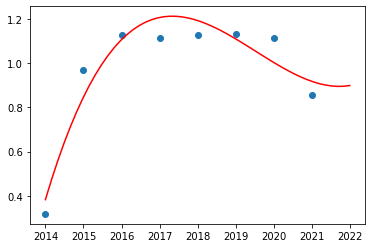

yfit
514    0.382337
515    0.846178
516    1.105677
517    1.205955
518    1.192137
519    1.109343
520    1.002697
521    0.917321
Name: Year, dtype: float64
Actual y= training data
514    0.317808
515    0.969178
516    1.128767
517    1.113699
518    1.128767
519    1.132192
520    1.114384
521    0.856849
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.21903
Coefficient P-Value: 0.24221
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Old Kent Road
Coefficients
[ 1.09519849e-02 -6.63267205e+01  1.33894490e+05 -9.00980471e+07]


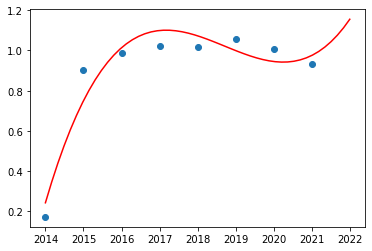

yfit
522    0.240940
523    0.749035
524    1.013186
525    1.099105
526    1.072503
527    0.999094
528    0.944589
529    0.974699
Name: Year, dtype: float64
Actual y= training data
522    0.170548
523    0.903425
524    0.987671
525    1.021233
526    1.015068
527    1.056164
528    1.008219
529    0.930822
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.36053
Coefficient P-Value: 0.11550
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Orpington
Coefficients
[ 6.96001077e-03 -4.21564502e+01  8.51131263e+04 -5.72805836e+07]


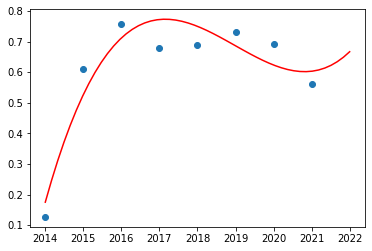

yfit
530    0.175550
531    0.526972
532    0.712023
533    0.772465
534    0.750056
535    0.686558
536    0.623730
537    0.603331
Name: Year, dtype: float64
Actual y= training data
530    0.127397
531    0.610274
532    0.756849
533    0.680137
534    0.690411
535    0.732877
536    0.692466
537    0.560274
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.23432
Coefficient P-Value: 0.22419
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Paddington
Coefficients
[ 1.57811000e-02 -9.55962311e+01  1.93029081e+05 -1.29922144e+08]


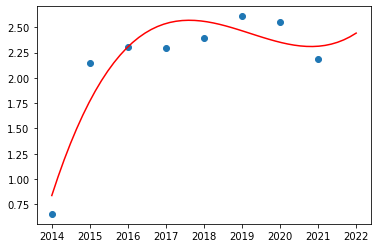

yfit
538    0.837267
539    1.771538
540    2.306846
541    2.537877
542    2.559318
543    2.465854
544    2.352173
545    2.312962
Name: Year, dtype: float64
Actual y= training data
538    0.655479
539    2.146575
540    2.305479
541    2.298630
542    2.391781
543    2.609589
544    2.553425
545    2.182877
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.41369
Coefficient P-Value: 0.08534
The number of required fire engines predicted for year 2022 is: 3
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Park Royal
Coefficients
[ 6.30967114e-03 -3.82165350e+01  7.71568209e+04 -5.19249120e+07]


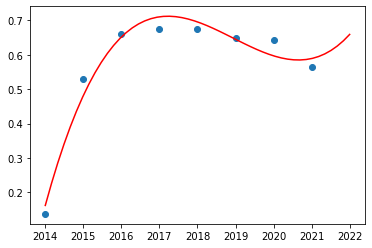

yfit
546    0.162287
547    0.481357
548    0.651281
549    0.709917
550    0.695122
551    0.644756
552    0.596676
553    0.588740
Name: Year, dtype: float64
Actual y= training data
546    0.137671
547    0.528082
548    0.660274
549    0.674658
550    0.673288
551    0.647945
552    0.643836
553    0.564384
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.32217
Coefficient P-Value: 0.14223
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Peckham
Coefficients
[ 5.66625153e-03 -3.43303103e+01  6.93326801e+04 -4.66741716e+07]


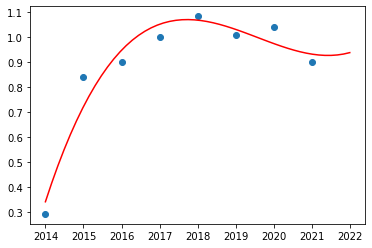

yfit
554    0.339820
555    0.721313
556    0.947167
557    1.051379
558    1.067946
559    1.030866
560    0.974137
561    0.931756
Name: Year, dtype: float64
Actual y= training data
554    0.291096
555    0.839726
556    0.899315
557    1.001370
558    1.083562
559    1.009589
560    1.039726
561    0.900000
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.42833
Coefficient P-Value: 0.07825
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Plaistow
Coefficients
[ 9.12549951e-03 -5.52803245e+01  1.11625392e+05 -7.51335439e+07]


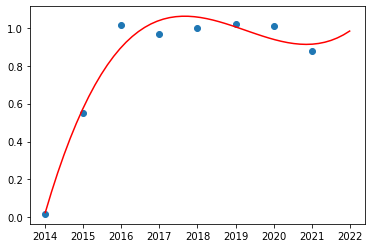

yfit
562    0.025301
563    0.578536
564    0.898411
565    1.039679
566    1.057093
567    1.005405
568    0.939370
569    0.913740
Name: Year, dtype: float64
Actual y= training data
562    0.017808
563    0.550000
564    1.016438
565    0.967808
566    0.997260
567    1.021233
568    1.008219
569    0.878767
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.46955
Coefficient P-Value: 0.06072
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Plumstead
Coefficients
[ 8.75363201e-03 -5.30346153e+01  1.07104801e+05 -7.21002588e+07]


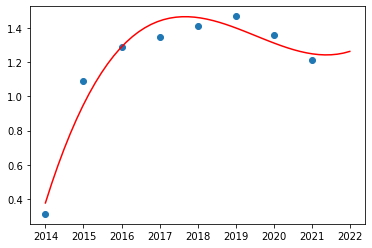

yfit
570    0.376038
571    0.951656
572    1.289455
573    1.441956
574    1.461681
575    1.401152
576    1.312891
577    1.249419
Name: Year, dtype: float64
Actual y= training data
570    0.311644
571    1.087671
572    1.286301
573    1.345205
574    1.413699
575    1.469178
576    1.358219
577    1.212329
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.41932
Coefficient P-Value: 0.08256
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Poplar
Coefficients
[ 1.83997525e-02 -1.11391549e+02  2.24786866e+05 -1.51205661e+08]


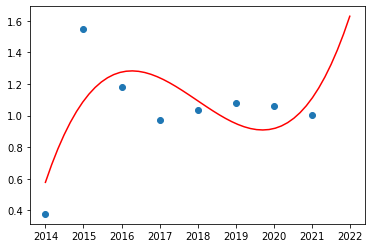

yfit
578    0.577864
579    1.091708
580    1.275462
581    1.239526
582    1.094297
583    0.950173
584    0.917555
585    1.106839
Name: Year, dtype: float64
Actual y= training data
578    0.378082
579    1.546575
580    1.178767
581    0.969178
582    1.037671
583    1.081507
584    1.058904
585    1.002740
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.02414
Coefficient P-Value: 0.71336
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Purley
Coefficients
[-8.59624627e-04  5.19334202e+00 -1.04582752e+04  7.02018037e+06]


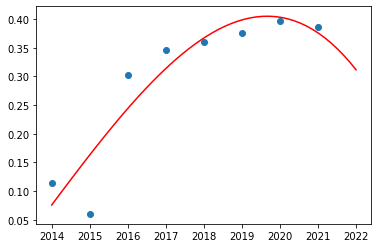

yfit
586    0.075778
587    0.162963
588    0.243971
589    0.313642
590    0.366821
591    0.398348
592    0.403067
593    0.375820
Name: Year, dtype: float64
Actual y= training data
586    0.114384
587    0.060274
588    0.302055
589    0.345890
590    0.359589
591    0.375342
592    0.397260
593    0.385616
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.72512
Coefficient P-Value: 0.00730
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Richmond
Coefficients
[ 1.42348179e-03 -8.63887451e+00  1.74758660e+04 -1.17841028e+07]


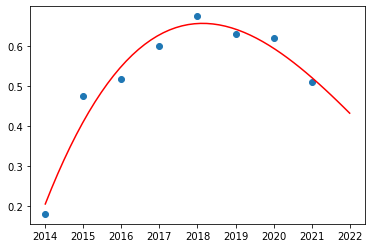

yfit
594    0.204317
595    0.410419
596    0.548667
597    0.627602
598    0.655764
599    0.641695
600    0.593935
601    0.521025
Name: Year, dtype: float64
Actual y= training data
594    0.179452
595    0.473973
596    0.517808
597    0.600000
598    0.673973
599    0.630137
600    0.619863
601    0.508219
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.41426
Coefficient P-Value: 0.08506
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Romford
Coefficients
[ 6.29410538e-03 -3.81189516e+01  7.69531204e+04 -5.17833171e+07]


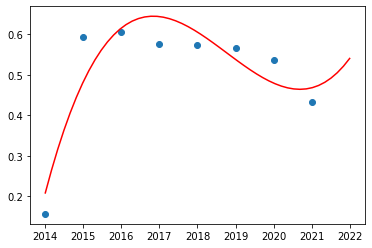

yfit
602    0.207970
603    0.482729
604    0.615318
605    0.643502
606    0.605047
607    0.537716
608    0.479274
609    0.467487
Name: Year, dtype: float64
Actual y= training data
602    0.156164
603    0.593836
604    0.604795
605    0.575342
606    0.573973
607    0.566438
608    0.536301
609    0.432192
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.08725
Coefficient P-Value: 0.47753
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Ruislip
Coefficients
[ 2.64459669e-03 -1.60237853e+01  3.23630134e+04 -2.17876780e+07]


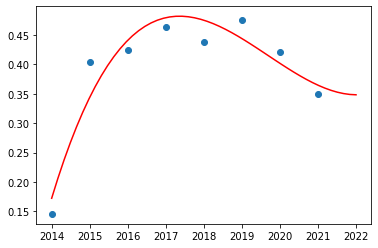

yfit
610    0.172489
611    0.343754
612    0.440623
613    0.478963
614    0.474641
615    0.443526
616    0.401484
617    0.364384
Name: Year, dtype: float64
Actual y= training data
610    0.145890
611    0.403425
612    0.424658
613    0.462329
614    0.438356
615    0.475342
616    0.421233
617    0.348630
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.20300
Coefficient P-Value: 0.26258
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Shadwell
Coefficients
[-6.71786450e-03  4.06339371e+01 -8.19264789e+04  5.50601511e+07]


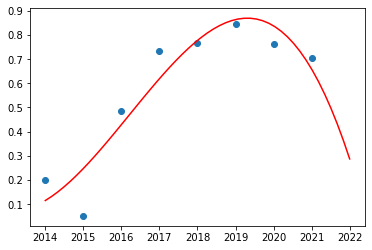

yfit
618    0.114944
619    0.247512
620    0.428973
621    0.619019
622    0.777344
623    0.863639
624    0.837599
625    0.658914
Name: Year, dtype: float64
Actual y= training data
618    0.198630
619    0.051370
620    0.483562
621    0.733562
622    0.767123
623    0.845890
624    0.763699
625    0.704110
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.65772
Coefficient P-Value: 0.01458
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Shoreditch
Coefficients
[ 9.98512566e-03 -6.04944113e+01  1.22167398e+05 -8.22382255e+07]


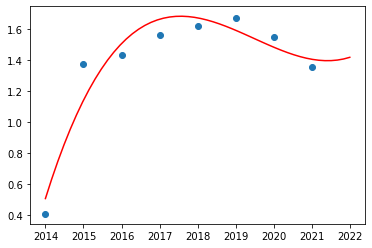

yfit
626    0.506144
627    1.141160
628    1.507523
629    1.665143
630    1.673931
631    1.593799
632    1.484656
633    1.406414
Name: Year, dtype: float64
Actual y= training data
626    0.406849
627    1.373288
628    1.436986
629    1.562329
630    1.623288
631    1.671233
632    1.547945
633    1.356849
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.35366
Coefficient P-Value: 0.11996
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Sidcup
Coefficients
[ 7.54289458e-03 -4.56885007e+01  9.22473699e+04 -6.20839428e+07]


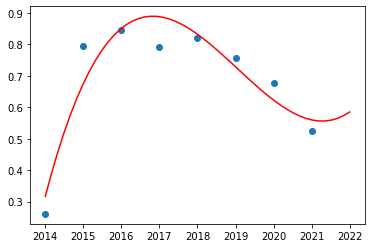

yfit
634    0.316490
635    0.675159
636    0.850421
637    0.887535
638    0.831758
639    0.728346
640    0.622558
641    0.559651
Name: Year, dtype: float64
Actual y= training data
634    0.260959
635    0.793836
636    0.846575
637    0.792466
638    0.820548
639    0.756849
640    0.675342
641    0.525342
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.02212
Coefficient P-Value: 0.72524
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Soho
Coefficients
[ 2.43738770e-02 -1.47683727e+02  2.98276337e+05 -2.00808957e+08]


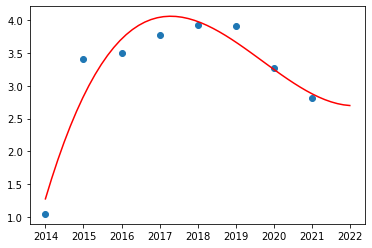

yfit
642    1.278778
643    2.838023
644    3.709987
645    4.040912
646    3.977043
647    3.664622
648    3.249893
649    2.879099
Name: Year, dtype: float64
Actual y= training data
642    1.050000
643    3.400000
644    3.499315
645    3.771918
646    3.927397
647    3.908904
648    3.269178
649    2.811644
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.16206
Coefficient P-Value: 0.32277
The number of required fire engines predicted for year 2022 is: 3
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Southall
Coefficients
[ 9.37110855e-03 -5.67653240e+01  1.14618195e+05 -7.71440253e+07]


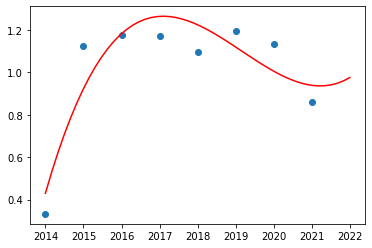

yfit
650    0.429629
651    0.923097
652    1.182619
653    1.264422
654    1.224733
655    1.119779
656    1.005785
657    0.938979
Name: Year, dtype: float64
Actual y= training data
650    0.332192
651    1.122603
652    1.174658
653    1.171233
654    1.097260
655    1.194521
656    1.136301
657    0.860274
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.13835
Coefficient P-Value: 0.36423
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Southgate
Coefficients
[ 5.25287100e-03 -3.18177286e+01  6.42421505e+04 -4.32363897e+07]


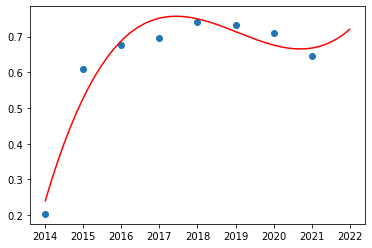

yfit
658    0.240307
659    0.528532
660    0.688509
661    0.751757
662    0.749793
663    0.714133
664    0.676296
665    0.667798
Name: Year, dtype: float64
Actual y= training data
658    0.203425
659    0.610274
660    0.676712
661    0.697260
662    0.741781
663    0.731507
664    0.710274
665    0.645890
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.39467
Coefficient P-Value: 0.09531
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Stanmore
Coefficients
[ 6.02255499e-03 -3.64933846e+01  7.37098730e+04 -4.96266915e+07]


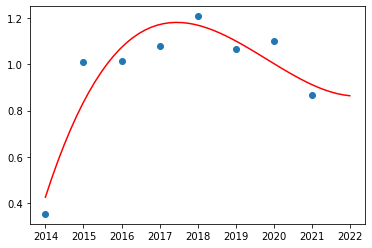

yfit
667    0.425405
668    0.836632
669    1.073780
670    1.172984
671    1.170379
672    1.102101
673    1.004285
674    0.913066
Name: Year, dtype: float64
Actual y= training data
667    0.352740
668    1.010959
669    1.013014
670    1.079452
671    1.208904
672    1.066438
673    1.100685
674    0.866438
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.22810
Coefficient P-Value: 0.23136
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Stoke Newington
Coefficients
[ 8.72249901e-03 -5.28553967e+01  1.06761821e+05 -7.18821115e+07]


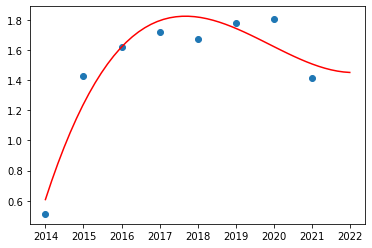

yfit
675    0.607700
676    1.242119
677    1.620757
678    1.795950
679    1.820032
680    1.745339
681    1.624205
682    1.508966
Name: Year, dtype: float64
Actual y= training data
675    0.512329
676    1.429452
677    1.623288
678    1.723288
679    1.676712
680    1.778767
681    1.808904
682    1.412329
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.35151
Coefficient P-Value: 0.12138
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Stratford
Coefficients
[ 1.34097825e-02 -8.11901506e+01  1.63856414e+05 -1.10230563e+08]


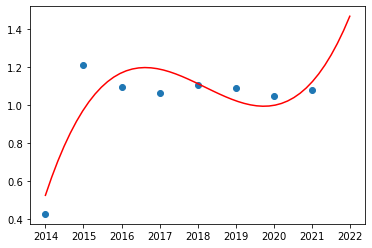

yfit
683    0.523381
684    0.974216
685    1.169020
686    1.188251
687    1.112369
688    1.021832
689    0.997099
690    1.118628
Name: Year, dtype: float64
Actual y= training data
683    0.425342
684    1.208904
685    1.093151
686    1.064384
687    1.104110
688    1.086986
689    1.044521
690    1.077397
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.20480
Coefficient P-Value: 0.26020
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Surbiton
Coefficients
[ 3.05624736e-03 -1.85229167e+01  3.74203827e+04 -2.51991007e+07]


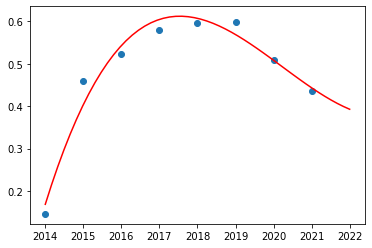

yfit
691    0.168566
692    0.403520
693    0.542670
694    0.604356
695    0.606913
696    0.568680
697    0.507994
698    0.443192
Name: Year, dtype: float64
Actual y= training data
691    0.145890
692    0.458219
693    0.523973
694    0.578767
695    0.595890
696    0.597945
697    0.508904
698    0.436301
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.24670
Coefficient P-Value: 0.21054
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Sutton
Coefficients
[ 6.27334985e-03 -3.79989387e+01  7.67223483e+04 -5.16357821e+07]


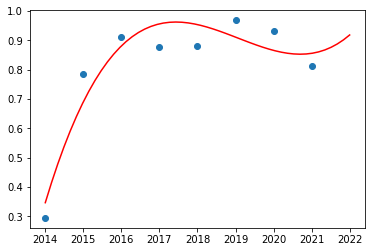

yfit
699    0.346430
700    0.690205
701    0.880902
702    0.956161
703    0.953623
704    0.910928
705    0.865715
706    0.855625
Name: Year, dtype: float64
Actual y= training data
699    0.294521
700    0.785616
701    0.910959
702    0.876712
703    0.879452
704    0.968493
705    0.931507
706    0.812329
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.37504
Coefficient P-Value: 0.10654
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Tooting
Coefficients
[ 7.97703126e-03 -4.83260159e+01  9.75885978e+04 -6.56894372e+07]


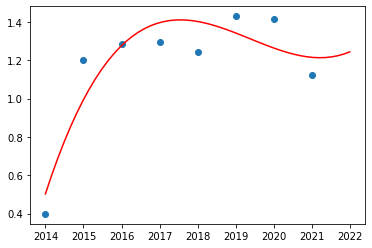

yfit
707    0.502428
708    0.994091
709    1.276029
710    1.396105
711    1.402182
712    1.342122
713    1.263786
714    1.215037
Name: Year, dtype: float64
Actual y= training data
707    0.397945
708    1.200685
709    1.284247
710    1.296575
711    1.243151
712    1.429452
713    1.415068
714    1.124658
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.33478
Coefficient P-Value: 0.13294
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Tottenham
Coefficients
[ 9.92804738e-03 -6.01501640e+01  1.21475367e+05 -8.17745278e+07]


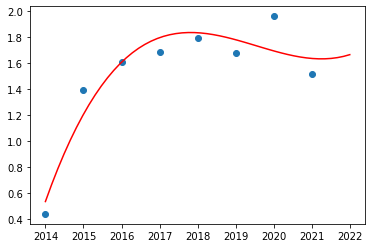

yfit
715    0.535482
716    1.205299
717    1.604881
718    1.793796
719    1.831612
720    1.777898
721    1.692223
722    1.634153
Name: Year, dtype: float64
Actual y= training data
715    0.440411
716    1.392466
717    1.610274
718    1.686301
719    1.791781
720    1.677397
721    1.958219
722    1.518493
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.45060
Coefficient P-Value: 0.06835
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Twickenham
Coefficients
[ 6.01390637e-03 -3.64259499e+01  7.35433736e+04 -4.94942378e+07]


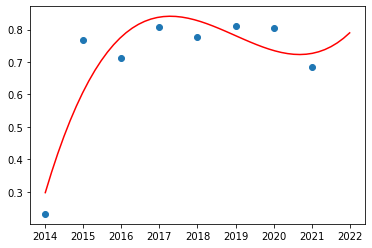

yfit
723    0.297157
724    0.609370
725    0.777811
726    0.838564
727    0.827712
728    0.781338
729    0.735526
730    0.726360
Name: Year, dtype: float64
Actual y= training data
723    0.231507
724    0.766438
725    0.710959
726    0.807534
727    0.776712
728    0.811644
729    0.803425
730    0.685616
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.29697
Coefficient P-Value: 0.16249
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Wallington
Coefficients
[ 5.77002903e-03 -3.49393189e+01  7.05227764e+04 -4.74485444e+07]


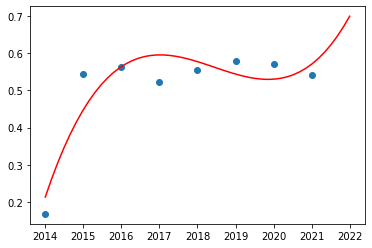

yfit
731    0.213159
732    0.448054
733    0.563961
734    0.595502
735    0.577297
736    0.543965
737    0.530127
738    0.570403
Name: Year, dtype: float64
Actual y= training data
731    0.167808
732    0.543836
733    0.562329
734    0.523288
735    0.554110
736    0.578767
737    0.569863
738    0.542466
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.36109
Coefficient P-Value: 0.11514
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Walthamstow
Coefficients
[ 9.12377143e-03 -5.52691519e+01  1.11601370e+05 -7.51163664e+07]


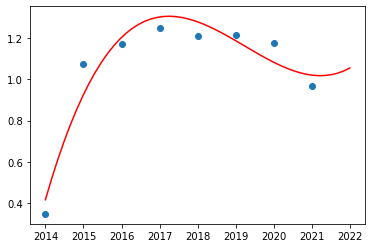

yfit
739    0.417757
740    0.925771
741    1.201879
742    1.300821
743    1.277342
744    1.186184
745    1.082090
746    1.019801
Name: Year, dtype: float64
Actual y= training data
739    0.349315
740    1.075342
741    1.169863
742    1.248630
743    1.210274
744    1.214384
745    1.177397
746    0.966438
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.23240
Coefficient P-Value: 0.22638
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Wandsworth
Coefficients
[ 1.06285441e-02 -6.43607986e+01  1.29911499e+05 -8.74082217e+07]


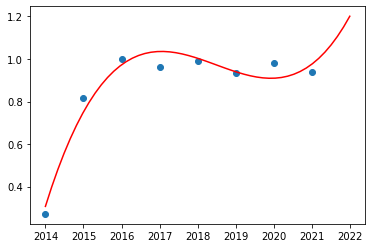

yfit
747    0.306694
748    0.750845
749    0.972498
750    1.035422
751    1.003391
752    0.940174
753    0.909543
754    0.975270
Name: Year, dtype: float64
Actual y= training data
747    0.271233
748    0.815068
749    0.997945
750    0.964384
751    0.989726
752    0.934247
753    0.982192
754    0.939041
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.40282
Coefficient P-Value: 0.09093
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Wembley
Coefficients
[ 6.09865889e-03 -3.69492008e+01  7.46197944e+04 -5.02320996e+07]


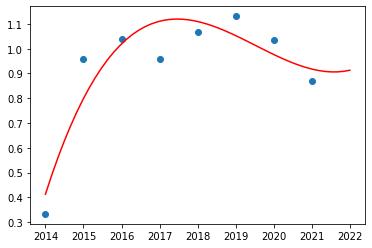

yfit
756    0.412848
757    0.798879
758    1.019295
759    1.110688
760    1.109648
761    1.052769
762    0.976643
763    0.917860
Name: Year, dtype: float64
Actual y= training data
756    0.333562
757    0.959589
758    1.039726
759    0.960274
760    1.067808
761    1.130822
762    1.036301
763    0.870548
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.27460
Coefficient P-Value: 0.18251
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Wennington
Coefficients
[ 3.10467702e-03 -1.87954648e+01  3.79287168e+04 -2.55130076e+07]


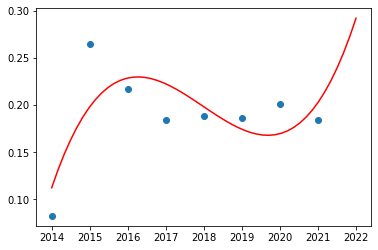

yfit
764    0.112007
765    0.197947
766    0.228502
767    0.222300
768    0.197970
769    0.174140
770    0.169438
771    0.202491
Name: Year, dtype: float64
Actual y= training data
764    0.082192
765    0.264384
766    0.216438
767    0.183562
768    0.188356
769    0.185616
770    0.200685
771    0.183562
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.03037
Coefficient P-Value: 0.67980
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
West Hampstead
Coefficients
[ 1.01390610e-02 -6.14471790e+01  1.24132134e+05 -8.35881184e+07]


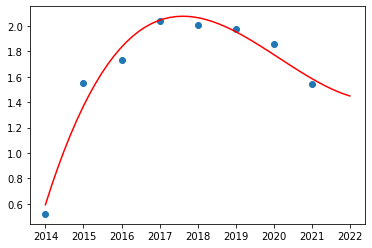

yfit
772    0.592227
773    1.369316
774    1.833295
775    2.044998
776    2.065260
777    1.954915
778    1.774797
779    1.585741
Name: Year, dtype: float64
Actual y= training data
772    0.519863
773    1.549315
774    1.735616
775    2.037671
776    2.004110
777    1.978767
778    1.854795
779    1.540411
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.30149
Coefficient P-Value: 0.15869
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
West Norwood
Coefficients
[ 1.23581702e-02 -7.48433040e+01  1.51088078e+05 -1.01668380e+08]


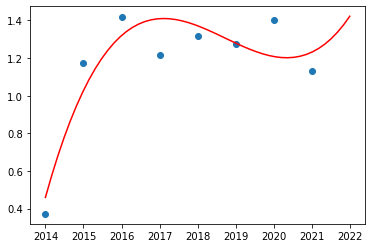

yfit
780    0.458967
781    1.027532
782    1.319768
783    1.409823
784    1.371847
785    1.279987
786    1.208394
787    1.231216
Name: Year, dtype: float64
Actual y= training data
780    0.371233
781    1.172603
782    1.419178
783    1.217808
784    1.315068
785    1.274658
786    1.404110
787    1.132877
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.28514
Coefficient P-Value: 0.17282
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Whitechapel
Coefficients
[ 1.20157048e-02 -7.27715595e+01  1.46910397e+05 -9.88602720e+07]


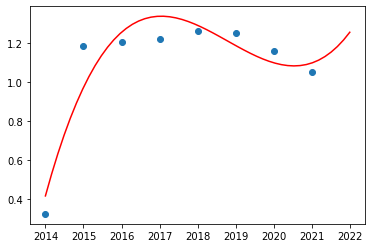

yfit
788    0.416387
789    0.973146
790    1.256657
791    1.339015
792    1.292313
793    1.188647
794    1.100110
795    1.098796
Name: Year, dtype: float64
Actual y= training data
788    0.323973
789    1.185616
790    1.205479
791    1.220548
792    1.263014
793    1.252740
794    1.161644
795    1.052055
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.23013
Coefficient P-Value: 0.22900
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Willesden
Coefficients
[ 6.60716739e-03 -4.00165196e+01  8.07870645e+04 -5.43654324e+07]


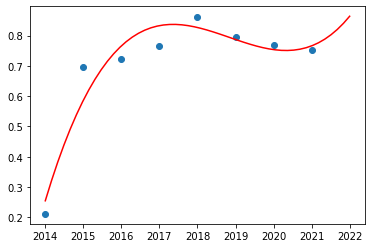

yfit
796    0.254369
797    0.586426
798    0.766097
799    0.833026
800    0.826856
801    0.787229
802    0.753789
803    0.766179
Name: Year, dtype: float64
Actual y= training data
796    0.210959
797    0.696575
798    0.721233
799    0.765753
800    0.860959
801    0.796575
802    0.769178
803    0.752740
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.41614
Coefficient P-Value: 0.08413
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Wimbledon
Coefficients
[ 6.10038682e-03 -3.69499110e+01  7.46015527e+04 -5.02065959e+07]


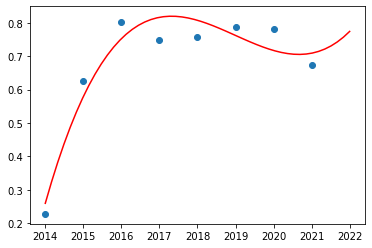

yfit
804    0.259205
805    0.578862
806    0.752374
807    0.816342
808    0.807370
809    0.762059
810    0.717012
811    0.708832
Name: Year, dtype: float64
Actual y= training data
804    0.227397
805    0.625342
806    0.803425
807    0.747260
808    0.756849
809    0.788356
810    0.780822
811    0.672603
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.34709
Coefficient P-Value: 0.12435
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Woodford
Coefficients
[ 3.84668616e-03 -2.33071169e+01  4.70726548e+04 -3.16903590e+07]


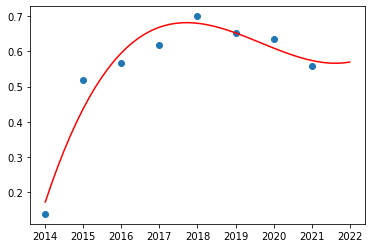

yfit
812    0.172624
813    0.437950
814    0.595478
815    0.668289
816    0.679461
817    0.652076
818    0.609212
819    0.573952
Name: Year, dtype: float64
Actual y= training data
812    0.139041
813    0.519863
814    0.567123
815    0.618493
816    0.699315
817    0.651370
818    0.635616
819    0.558219
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.41015
Coefficient P-Value: 0.08714
The number of required fire engines predicted for year 2022 is: 1
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 
Woodside
Coefficients
[ 7.64148281e-03 -4.62707286e+01  9.33928569e+04 -6.28347082e+07]


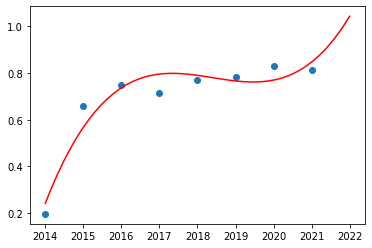

yfit
820    0.242767
821    0.567512
822    0.736327
823    0.795060
824    0.789562
825    0.765679
826    0.769263
827    0.846160
Name: Year, dtype: float64
Actual y= training data
820    0.197260
821    0.658219
822    0.748630
823    0.713699
824    0.770548
825    0.782877
826    0.830137
827    0.810959
Name: Avg Daily Eng Deployed, dtype: float64
Coefficient of Determination R^2: 0.56584
Coefficient P-Value: 0.03131
The number of required fire engines predicted for year 2022 is: 2
 
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
 


In [299]:
station_list = []
fireeng_2022_list = []
r2_list = []
p_value_list = []

for station in fireeng_station['Station'].unique():
    station_series = df_sliced_dict.get(station)
    x = station_series.loc[:,'Year']
    y = station_series.loc[:,'Avg Daily Eng Deployed']
    
    # After adjusting the order of the regression model, a order 3 regression 
    # seems to approximate the data well with most of the stations.
    # In case of stations that don't provide good R2 and P-value results, 
    # a case by case analysis will be required.
    
    p3 = np.polyfit(x,y,3)
    
    # Print Station name
    print (station)
    
    print('Coefficients')
    
    # Print coefficients as result of the regression
    print (p3)
    
    # Plot the training data and the polynomial function on the same plot 
    plt.plot(x,y,'o')
    xp = np.linspace(2014,2022,50)
    plt.plot(xp,np.polyval(p3,xp),'r-')
    plt.show()
    
    # Identify the best fit function dependent variables
    yfit = p3[3] + p3[2]*x + p3[1]*x**2 + p3[0]*x**3
    print ('yfit')
    print (yfit)
    print ('Actual y= training data')
    print (y)
    
    # Let's determine the Coefficient of Determination R^2 and the Coefficient P-Value
    slope,intercept,r_value,p_value,std_err = linregress(x,y)
    print('Coefficient of Determination R^2: %.5f' % (r_value**2))
    print('Coefficient P-Value: %.5f' % (p_value))
    
    # Let's determine the number of fire engines required for the year 2022.
    # Note: the prediction is rounded up to the nearest integer
    
    year_pred = 2022
    fireeng_2022_pred = math.ceil (p3[3] + p3[2]*year_pred + p3[1]*year_pred**2 + p3[0]*year_pred**3)
    print ('The number of required fire engines predicted for year 2022 is: %.0f' % (fireeng_2022_pred))
        
    station_list.append(station)
    fireeng_2022_list.append(fireeng_2022_pred)
    r2_list.append(r_value**2)
    p_value_list.append(p_value)
          
    print(' ')
    print('-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-')
    print(' ')     

## 5. Prediction

Here is the prediction of the fire engines to be allocated per fire station across London in 2022.

In [293]:
a_list = list(zip(station_list, fireeng_2022_list, r2_list, p_value_list ))
fireengine_2022_df = pd.DataFrame(a_list, columns=['Station', 'Fire Engine 2022', 'R2', 'p-Value'])
print(fireengine_2022_df)

              Station  Fire Engine 2022        R2   p-Value
0               Acton                 2  0.320025  0.143873
1           Addington                 1  0.158339  0.328919
2             Barking                 2  0.001508  0.927262
3              Barnet                 1  0.338047  0.130609
4           Battersea                 2  0.391683  0.096950
5           Beckenham                 1  0.162750  0.321646
6       Bethnal Green                 2  0.473666  0.059148
7              Bexley                 1  0.247274  0.209925
8         Biggin Hill                 1  0.205405  0.259416
9             Brixton                 2  0.372675  0.107956
10            Bromley                 1  0.263621  0.193111
11            Chelsea                 2  0.506843  0.047596
12          Chingford                 1  0.365000  0.112676
13           Chiswick                 1  0.456180  0.066033
14            Clapham                 2  0.485828  0.054692
15            Croydon                 2 

In [294]:
fireengine_2022_df.describe()

Fire Engine 2022          R2     p-Value
count        102.000000  102.000000  102.000000
mean           1.431373    0.316905    0.203786
std            0.536025    0.158472    0.188744
min            1.000000    0.001508    0.007296
25%            1.000000    0.221294    0.084682
50%            1.000000    0.320687    0.143367
75%            2.000000    0.415020    0.239496
max            3.000000    0.725124    0.927262

In [295]:
fireengine_2022_df[fireengine_2022_df['R2']==fireengine_2022_df['R2'].max()]

Station  Fire Engine 2022        R2   p-Value
72  Purley                 1  0.725124  0.007296

In [296]:
column_name = "Fire Engine 2022"
column_sum = fireengine_2022_df[column_name].sum()
print('The total fire engines across London predicted for 2022 are: %.0f' % (column_sum))

The total fire engines across London predicted for 2022 are: 146


Comment: based on the "Statement of Accounts 2020–2021 London Fire Brigade", during the year 2020-2021 there 142 fire engines in total.

## 6. Predict the areas with the highest risk

The higher is the number of fire engines, the higher is the risk in the area. Therefore let's find out the areas with the highest number of fire engines

In [297]:
fireengine_2022_df[fireengine_2022_df['Fire Engine 2022']==fireengine_2022_df['Fire Engine 2022'].max()]



Station  Fire Engine 2022        R2   p-Value
66  Paddington                 3  0.413694  0.085344
79        Soho                 3  0.162061  0.322771

Conclusion: Paddington and Soho are the areas with the highest risk. 